In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import preprocessing

import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

import string
from scipy import sparse
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import neighbors
from sklearn import metrics
# from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

from textblob import TextBlob

import warnings
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=DeprecationWarning)
    
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [2]:
!pip install langdetect
from langdetect import detect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
df = pd.read_csv('listings.csv', delimiter=",")
dfR = pd.read_csv('reviews.csv', delimiter=",")
pd.set_option('display.max_columns', None)
print(dfR.head(), dfR.shape)
df.head()

   listing_id      id        date  reviewer_id         reviewer_name  \
0       44077  203703  2011-03-20       393348             Christian   
1       44077  211369  2011-03-28       444004               Solidea   
2       44077  234215  2011-04-21       465058  Michael And Isabelle   
3       44077  261843  2011-05-13       490005                Weston   
4       44077  268148  2011-05-17       520460               Barbara   

                                            comments  
0  We enjoyed our stay very much. The room was co...  
1  We have been here 4 nights. Stay in a home is ...  
2  Teresa and Hughie were great hosts. They were ...  
3  No surprises, was as described.  Very gracious...  
4  Teresa was a lovely hostess, and we had a deli...   (243183, 6)


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,44077,https://www.airbnb.com/rooms/44077,20220911231053,2022-09-12,city scrape,cosy comfortable Irish cottage twin,Our house was built in 1937 when there was ple...,I like our neighbourhood as there is no shorta...,https://a0.muscache.com/pictures/525706/050a3a...,193005,https://www.airbnb.com/users/show/193005,Teresa,2010-08-06,"Dublin, Ireland","I am a friendly outgoing Irishwoman ,who love...",within an hour,100%,99%,t,https://a0.muscache.com/im/users/193005/profil...,https://a0.muscache.com/im/users/193005/profil...,Churchtown,2,2,"['email', 'phone']",t,t,"Churchtown, Ireland",Dn Laoghaire-Rathdown,NaN,53.29178,-6.25792,Private room in bungalow,Private room,2,NaN,1.5 shared baths,1.0,2.0,"[""Oven"", ""Hot water kettle"", ""Fire extinguishe...",$70.00,3,1125,3,3,1125,1125,3.0,1125.0,NaN,t,2,11,18,104,2022-09-12,258,31,7,2011-03-20,2022-09-09,4.78,4.83,4.74,4.93,4.93,4.66,4.82,NaN,f,2,0,2,0,1.85
1,85156,https://www.airbnb.com/rooms/85156,20220911231053,2022-09-12,city scrape,Cosy Comfortable Irish Cottage 1 Double Bed,Our Cottage is a charming light filled cottage...,"I love Dundrum and its surrounding areas ,<br ...",https://a0.muscache.com/pictures/1749253/9ed2a...,193005,https://www.airbnb.com/users/show/193005,Teresa,2010-08-06,"Dublin, Ireland","I am a friendly outgoing Irishwoman ,who love...",within an hour,100%,99%,t,https://a0.muscache.com/im/users/193005/profil...,https://a0.muscache.com/im/users/193005/profil...,Churchtown,2,2,"['email', 'phone']",t,t,"Churchtown, Ireland",Dn Laoghaire-Rathdown,NaN,53.29209,-6.25624,Private room in bungalow,Private room,2,NaN,1.5 shared baths,1.0,1.0,"[""Oven"", ""Fire extinguisher"", ""Dryer"", ""Hanger...",$67.00,3,21,3,3,21,21,3.0,21.0,NaN,t,3,9,21,110,2022-09-12,210,28,4,2011-05-24,2022-09-11,4.79,4.86,4.74,4.90,4.88,4.64,4.78,NaN,f,2,0,2,0,1.53
2,159889,https://www.airbnb.com/rooms/159889,20220911231053,2022-09-12,city scrape,Friendly Single Room,Washing can be done at a cost of €5 per load....,Plenty of buses into the city and the area is ...,https://a0.muscache.com/pictures/3031697/a8259...,766611,https://www.airbnb.com/users/show/766611,Margaret,2011-07-01,"Dublin, Ireland",Used to host students and now I am looking fo...,within an hour,100%,95%,f,https://a0.muscache.com/im/users/766611/profil...,https://a0.muscache.com/im/users/766611/profil...,Beaumont,3,4,"['email', 'phone']",t,t,"Dublin, Ireland",Dublin City,NaN,53.39027,-6.23547,Private room in home,Private room,1,NaN,2 shared baths,1.0,1.0,"[""Oven"", ""Fire extinguisher"", ""Hangers"", ""Carb...",$45.00,2,21,1,2,21,21,2.0,21.0,NaN,t,1,16,36,290,2022-09-12,355,44,6,2012-03-20,2022-09-01,4.74,4.77,4.71,4.86,4.90,4.63

In [4]:
df.dtypes

id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
source                                           object
                                                 ...   
calculated_host_listings_count                    int64
calculated_host_listings_count_entire_homes       int64
calculated_host_listings_count_private_rooms      int64
calculated_host_listings_count_shared_rooms       int64
reviews_per_month                               float64
Length: 75, dtype: object

In [5]:
list(df.select_dtypes(['object']).columns)

['listing_url',
 'last_scraped',
 'source',
 'name',
 'description',
 'neighborhood_overview',
 'picture_url',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'neighbourhood',
 'neighbourhood_cleansed',
 'property_type',
 'room_type',
 'bathrooms_text',
 'amenities',
 'price',
 'has_availability',
 'calendar_last_scraped',
 'first_review',
 'last_review',
 'instant_bookable']

In [6]:
list(df.select_dtypes(['int64']).columns)

['id',
 'scrape_id',
 'host_id',
 'host_listings_count',
 'host_total_listings_count',
 'accommodates',
 'minimum_nights',
 'maximum_nights',
 'minimum_minimum_nights',
 'maximum_minimum_nights',
 'minimum_maximum_nights',
 'maximum_maximum_nights',
 'availability_30',
 'availability_60',
 'availability_90',
 'availability_365',
 'number_of_reviews',
 'number_of_reviews_ltm',
 'number_of_reviews_l30d',
 'calculated_host_listings_count',
 'calculated_host_listings_count_entire_homes',
 'calculated_host_listings_count_private_rooms',
 'calculated_host_listings_count_shared_rooms']

In [7]:
list(df.select_dtypes(['float64']).columns)

['neighbourhood_group_cleansed',
 'latitude',
 'longitude',
 'bathrooms',
 'bedrooms',
 'beds',
 'minimum_nights_avg_ntm',
 'maximum_nights_avg_ntm',
 'calendar_updated',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'license',
 'reviews_per_month']

Index(['listing_id', 'listing_url', 'scrape_id', 'last_scraped', 'source',
       'name', 'description', 'neighborhood_overview', 'picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bathrooms_text', 'bedrooms', 'beds',
       'amenities', 'price', 'minimum_nights', 'maximum_nights',
       'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability',
       'availability_30', '

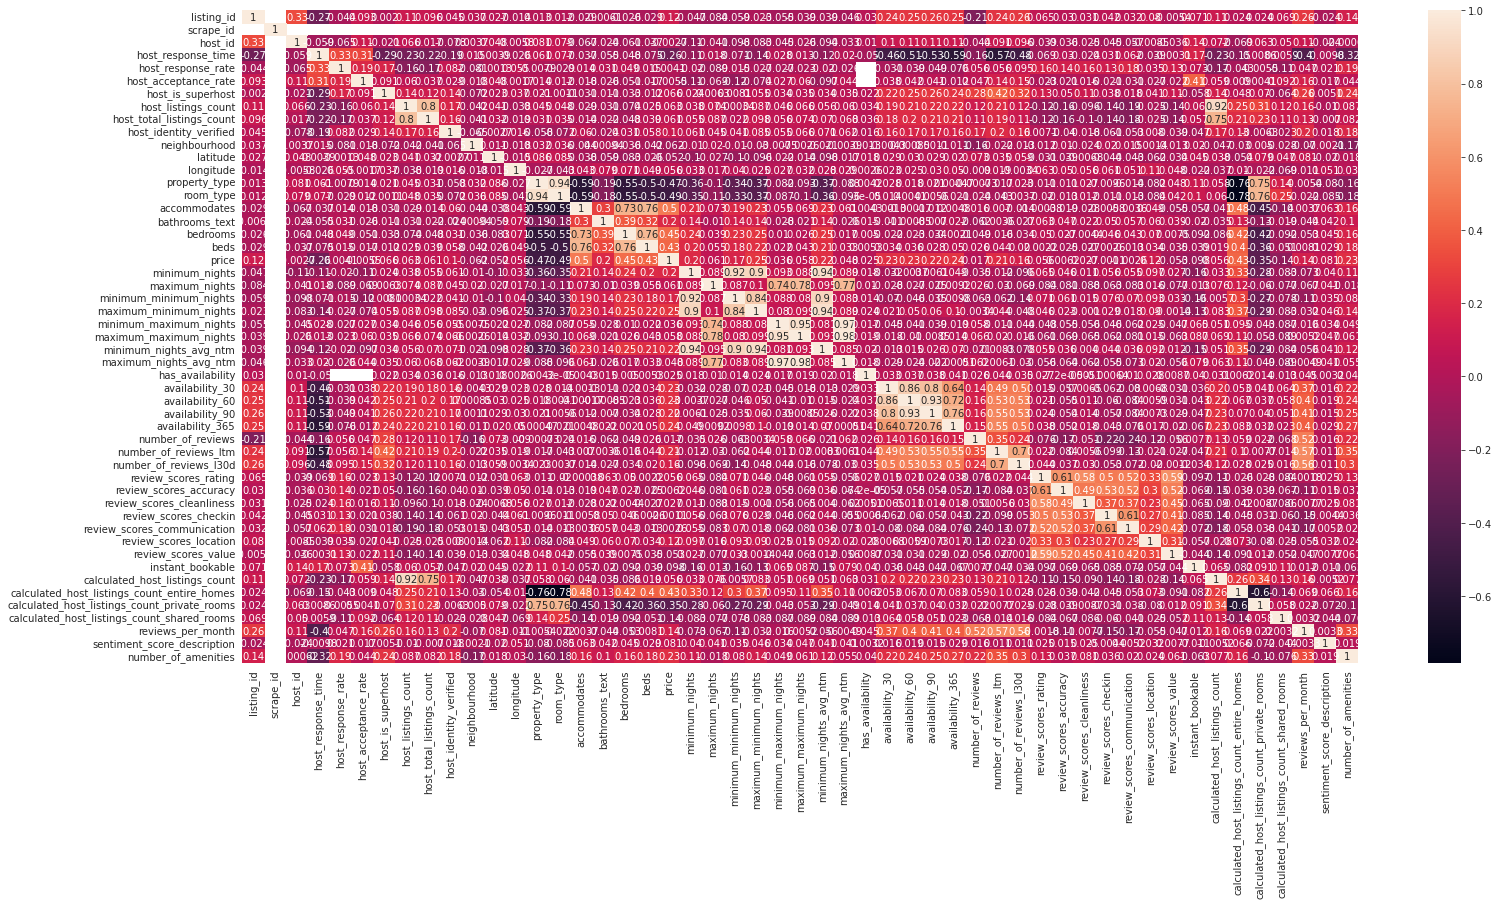

In [268]:
corr = df.corr(method='kendall')
plt.figure(figsize=(25,12))
sns.heatmap(corr, annot=True)
df.columns

In [9]:
df['price'] = df['price'].replace('\$','', regex=True)
df['price'] = df['price'].replace('\,','', regex=True)
print(df['price'])
df['price'] = pd.to_numeric(df['price'])
list(df.select_dtypes(['float64']).columns)

0        70.00
1        67.00
2        45.00
3        80.00
4       251.00
         ...  
7561    200.00
7562     48.00
7563     64.00
7564    240.00
7565    280.00
Name: price, Length: 7566, dtype: object


['neighbourhood_group_cleansed',
 'latitude',
 'longitude',
 'bathrooms',
 'bedrooms',
 'beds',
 'price',
 'minimum_nights_avg_ntm',
 'maximum_nights_avg_ntm',
 'calendar_updated',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'license',
 'reviews_per_month']

In [10]:
df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,44077,https://www.airbnb.com/rooms/44077,20220911231053,2022-09-12,city scrape,cosy comfortable Irish cottage twin,Our house was built in 1937 when there was ple...,I like our neighbourhood as there is no shorta...,https://a0.muscache.com/pictures/525706/050a3a...,193005,https://www.airbnb.com/users/show/193005,Teresa,2010-08-06,"Dublin, Ireland","I am a friendly outgoing Irishwoman ,who love...",within an hour,100%,99%,t,https://a0.muscache.com/im/users/193005/profil...,https://a0.muscache.com/im/users/193005/profil...,Churchtown,2,2,"['email', 'phone']",t,t,"Churchtown, Ireland",Dn Laoghaire-Rathdown,NaN,53.29178,-6.25792,Private room in bungalow,Private room,2,NaN,1.5 shared baths,1.0,2.0,"[""Oven"", ""Hot water kettle"", ""Fire extinguishe...",70.0,3,1125,3,3,1125,1125,3.0,1125.0,NaN,t,2,11,18,104,2022-09-12,258,31,7,2011-03-20,2022-09-09,4.78,4.83,4.74,4.93,4.93,4.66,4.82,NaN,f,2,0,2,0,1.85
1,85156,https://www.airbnb.com/rooms/85156,20220911231053,2022-09-12,city scrape,Cosy Comfortable Irish Cottage 1 Double Bed,Our Cottage is a charming light filled cottage...,"I love Dundrum and its surrounding areas ,<br ...",https://a0.muscache.com/pictures/1749253/9ed2a...,193005,https://www.airbnb.com/users/show/193005,Teresa,2010-08-06,"Dublin, Ireland","I am a friendly outgoing Irishwoman ,who love...",within an hour,100%,99%,t,https://a0.muscache.com/im/users/193005/profil...,https://a0.muscache.com/im/users/193005/profil...,Churchtown,2,2,"['email', 'phone']",t,t,"Churchtown, Ireland",Dn Laoghaire-Rathdown,NaN,53.29209,-6.25624,Private room in bungalow,Private room,2,NaN,1.5 shared baths,1.0,1.0,"[""Oven"", ""Fire extinguisher"", ""Dryer"", ""Hanger...",67.0,3,21,3,3,21,21,3.0,21.0,NaN,t,3,9,21,110,2022-09-12,210,28,4,2011-05-24,2022-09-11,4.79,4.86,4.74,4.90,4.88,4.64,4.78,NaN,f,2,0,2,0,1.53
2,159889,https://www.airbnb.com/rooms/159889,20220911231053,2022-09-12,city scrape,Friendly Single Room,Washing can be done at a cost of €5 per load....,Plenty of buses into the city and the area is ...,https://a0.muscache.com/pictures/3031697/a8259...,766611,https://www.airbnb.com/users/show/766611,Margaret,2011-07-01,"Dublin, Ireland",Used to host students and now I am looking fo...,within an hour,100%,95%,f,https://a0.muscache.com/im/users/766611/profil...,https://a0.muscache.com/im/users/766611/profil...,Beaumont,3,4,"['email', 'phone']",t,t,"Dublin, Ireland",Dublin City,NaN,53.39027,-6.23547,Private room in home,Private room,1,NaN,2 shared baths,1.0,1.0,"[""Oven"", ""Fire extinguisher"", ""Hangers"", ""Carb...",45.0,2,21,1,2,21,21,2.0,21.0,NaN,t,1,16,36,290,2022-09-12,355,44,6,2012-03-20,2022-09-01,4.74,4.77,4.71,4.86,4.90,4.63,4.74,

In [11]:
le = preprocessing.LabelEncoder()
df['room_type'] = le.fit_transform(df['room_type'])
le_name_mappingR = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mappingR)

{'Entire home/apt': 0, 'Hotel room': 1, 'Private room': 2, 'Shared room': 3}


In [12]:
# df['property_type']  = le.fit_transform(df['property_type'])
# le_name_mappingP = dict(zip(le.classes_, le.transform(le.classes_)))
# print(le_name_mappingP)
# df['property_type'].dtype

**Room**: Casa particular, Entire guest suite, Private room, Private room in bed and breakfast, Private room in bungalow, Private room in cabin, Private room in casa particular, Private room in chalet, Private room in condo, Private room in cottage, Private room in farm stay, Private room in floor, Private room in guest suite, Private room in guesthouse, Private room in home, Private room in hostel, Private room in loft, Private room in rental unit, Private room in serviced apartment, Private room in tent, Private room in tiny home, Private room in townhouse, Private room in vacation home, Private room in villa, Room in aparthotel, Room in bed and breakfast, Room in boutique hotel, Room in hostel, Room in hotel, Room in serviced apartment, Shared room, Shared room in bed and breakfast, Shared room in condo, Shared room in home, Shared room in hostel, Shared room in loft, Shared room in rental unit, Shared room in serviced apartment

**Entire Property**: Entire cabin, Entire chalet, Entire cottage, Entire home, Tiny home, Entire rental unit, Entire townhouse, Entire bungalow, Entire condo, Entire guesthouse, Entire place, Entire vacation home, 

**Luxurious**: Boat, Castle, Entire serviced apartment, Entire villa, 

**Unusual**: Barn, Camper/RV, Dome, Farm stay, Houseboat, Hut, Ice dome, Tipi


In [13]:
replace_dict = {'Casa particular': 'Room', 'Entire guest suite': 'Room', 'Private room in bed and breakfast': 'Room', 'Private room in bungalow':'Room', 'Private room in cabin':'Room', 'Private room in casa particular':'Room', 'Private room in chalet':'Room', 'Private room in condo':'Room', 'Private room in cottage':'Room', 'Private room in farm stay':'Room', 'Private room in floor':'Room', 'Private room in guest suite':'Room', 'Private room in guesthouse':'Room', 'Private room in home':'Room', 'Private room in hostel':'Room', 'Private room in loft':'Room', 'Private room in rental unit':'Room', 'Private room in serviced apartment':'Room', 'Private room in tent':'Room', 'Private room in tiny home':'Room', 'Private room in townhouse':'Room', 'Private room in vacation home':'Room', 'Private room in villa':'Room', 'Room in aparthotel':'Room', 'Room in bed and breakfast':'Room', 'Room in boutique hotel':'Room', 'Room in hostel':'Room', 'Room in hotel':'Room', 'Room in serviced apartment':'Room', 'Shared room':'Room', 'Shared room in bed and breakfast':'Room', 'Shared room in condo':'Room', 'Shared room in home':'Room', 'Shared room in hostel':'Room', 'Shared room in loft':'Room', 'Shared room in rental unit':'Room', 'Shared room in serviced apartment':'Room', 'Private room':'Room', 'Entire cabin':'Entire Property', 'Entire chalet':'Entire Property', 'Entire cottage':'Entire Property', 'Entire home':'Entire Property', 'Tiny home':'Entire Property', 'Entire rental unit':'Entire Property', 'Entire townhouse':'Entire Property', 'Entire bungalow':'Entire Property', 'Entire condo':'Entire Property', 'Entire property':'Entire Property', 'Entire loft':'Entire Property', 'Entire guesthouse':'Entire Property', 'Entire place':'Entire Property', 'Entire vacation home':'Entire Property', 'Boat':'Luxurious', 'Castle':'Luxurious', 'Entire serviced apartment':'Luxurious', 'Entire villa':'Luxurious', 'Barn':'Unusual', 'Camper/RV':'Unusual', 'Dome':'Unusual', 'Farm stay':'Unusual', 'Houseboat':'Unusual', 'Hut':'Unusual', 'Ice dome':'Unusual', 'Tipi':'Unusual'}

# Replace the values in the dataframe using the dictionary 38
# df = df.replace(replace_dict)
df['property_type'] = df['property_type'].replace(replace_dict)

# Print the updated dataframe
print(df.sample(5))

                      id                                      listing_url  \
7500  709176039973911560  https://www.airbnb.com/rooms/709176039973911560   
4905            38969224            https://www.airbnb.com/rooms/38969224   
2313            19495100            https://www.airbnb.com/rooms/19495100   
3554            26726684            https://www.airbnb.com/rooms/26726684   
1250            13263446            https://www.airbnb.com/rooms/13263446   

           scrape_id last_scraped           source  \
7500  20220911231053   2022-09-12      city scrape   
4905  20220911231053   2022-09-12  previous scrape   
2313  20220911231053   2022-09-12      city scrape   
3554  20220911231053   2022-09-12  previous scrape   
1250  20220911231053   2022-09-12  previous scrape   

                                               name  \
7500  4-bedroom home with indoor fireplace near sea   
4905    Spacious & Central on-suite double bedroom!   
2313       *3 Arena Modern Deluxe City Twin, TV

In [14]:
df['property_type'].unique()

array(['Room', 'Entire Property', 'Luxurious', 'Unusual'], dtype=object)

In [15]:
df['property_type']  = le.fit_transform(df['property_type'])
le_name_mappingB = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mappingB)
df['property_type'].dtype

{'Entire Property': 0, 'Luxurious': 1, 'Room': 2, 'Unusual': 3}


dtype('int64')

In [16]:
df['has_availability']  = le.fit_transform(df['has_availability'])
le_name_mappingB = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mappingB)
df['has_availability'].dtype

{'f': 0, 't': 1}


dtype('int64')

In [17]:
df['instant_bookable']  = le.fit_transform(df['instant_bookable'])
le_name_mappingB = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mappingB)
df['instant_bookable'].dtype

{'f': 0, 't': 1}


dtype('int64')

**0-2 Baths**: 0 baths, 0 shared baths, 1 bath, 1 private bath, 1 shared bath, 1.5 baths, 1.5 shared baths, 2 baths, 2 shared baths, Half-bath, Private half-bath, Shared half-bath

**2.5-4 Baths**: 2.5 baths, 2.5 baths, 2.5 shared baths, 3 baths, 3 shared baths, 3.5 baths, 3.5 shared baths, 4 baths, 4 shared baths

**4.5 and more Baths**: 4.5 baths, 5 baths, 5.5 baths, 6 baths, 6 shared baths, 6.5 baths, 7 baths, 7.5 baths, 8 baths, 8.5 baths, 9.5 baths

**NAN**: nan

In [18]:
replace_dict = {'0 baths': '0-2 Baths', '0 shared baths': '0-2 Baths', '1 bath': '0-2 Baths', '1 private bath': '0-2 Baths', '1 shared bath': '0-2 Baths', '1.5 baths': '0-2 Baths', '1.5 shared baths': '0-2 Baths', '2 baths': '0-2 Baths', '2 shared baths': '0-2 Baths', 'Half-bath': '0-2 Baths', 'Private half-bath': '0-2 Baths', 'Shared half-bath': '0-2 Baths', '2.5 baths':'2.5-4 Baths', '2.5 shared baths':'2.5-4 Baths', '3 baths':'2.5-4 Baths', '3 shared baths':'2.5-4 Baths', '3.5 baths':'2.5-4 Baths', '3.5 shared baths':'2.5-4 Baths', '4 baths':'2.5-4 Baths', '4 shared baths':'2.5-4 Baths', '4.5 baths':'4.5 and more Baths', '5 baths':'4.5 and more Baths', '5.5 baths':'4.5 and more Baths', '6 baths':'4.5 and more Baths', '6 shared baths':'4.5 and more Baths', '6.5 baths':'4.5 and more Baths', '7 baths':'4.5 and more Baths', '7.5 baths':'4.5 and more Baths', '8 baths':'4.5 and more Baths', '8.5 baths':'4.5 and more Baths', '9.5 baths':'4.5 and more Baths', 'NAN':'nan'}

# Replace the values in the dataframe using the dictionary 38
# df = df.replace(replace_dict)
df['bathrooms_text'] = df['bathrooms_text'].replace(replace_dict)

# Print the updated dataframe
print(df.sample(5))
print(df['bathrooms_text'].unique())

                      id                                      listing_url  \
7127  683130416382147198  https://www.airbnb.com/rooms/683130416382147198   
737              8928575             https://www.airbnb.com/rooms/8928575   
3743            27819369            https://www.airbnb.com/rooms/27819369   
7249  691769200968540384  https://www.airbnb.com/rooms/691769200968540384   
758              9126603             https://www.airbnb.com/rooms/9126603   

           scrape_id last_scraped           source  \
7127  20220911231053   2022-09-12  previous scrape   
737   20220911231053   2022-09-12  previous scrape   
3743  20220911231053   2022-09-12      city scrape   
7249  20220911231053   2022-09-12      city scrape   
758   20220911231053   2022-09-12  previous scrape   

                                                  name  \
7127  1 ensuite room in modern penthouse Dun Laoghaire   
737                     4 Bed, 15 minutes from Trinity   
3743               1 bed shared room A

In [19]:
df['bathrooms_text']  = le.fit_transform(df['bathrooms_text'])
le_name_mappingB = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mappingB)
df['bathrooms_text'].dtype

{'0-2 Baths': 0, '2.5-4 Baths': 1, '4.5 and more Baths': 2, nan: 3}


dtype('int64')

In [20]:
df['host_response_time']  = le.fit_transform(df['host_response_time'])
le_name_mappingH = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mappingH)
df['host_response_time'].dtype

{'a few days or more': 0, 'within a day': 1, 'within a few hours': 2, 'within an hour': 3, nan: 4}


dtype('int64')

In [21]:
# host_identity_verified
df['host_identity_verified']  = le.fit_transform(df['host_identity_verified'])
le_name_mappingH = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mappingH)
df['host_identity_verified'].dtype

{'f': 0, 't': 1}


dtype('int64')

In [22]:
# host_is_superhost
df['host_is_superhost']  = le.fit_transform(df['host_is_superhost'])
le_name_mappingH = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mappingH)
df['host_is_superhost'].dtype

{'f': 0, 't': 1}


dtype('int64')

In [23]:
df['neighbourhood']  = le.fit_transform(df['neighbourhood'])
le_name_mappingN = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mappingN)
df['neighbourhood'].dtype

{' , Ireland': 0, 'Addison Park, County Dublin, Ireland': 1, 'Arbour Hill, County Dublin, Ireland': 2, 'Ardcath, Garristowm, Dublin, Ireland': 3, 'Artane, County Dublin, Ireland': 4, 'Artane, Dublin, Ireland': 5, 'Ashbourne, County Meath, Ireland': 6, 'Ashbourne, Meath, Ireland': 7, 'Ashtown, County Dublin, Ireland': 8, 'Ashtown, Dublin, Ireland': 9, 'Baile Átha Cliath, Contae Bhaile Átha Cliath, Ireland': 10, 'Balbriggan, County Dublin, Ireland': 11, 'Baldonnell, County Dublin, Ireland': 12, 'Baldoyle, County Dublin, Ireland': 13, 'Balgriffin, County Dublin, Ireland': 14, 'Ballinteer, Dublin, Ireland': 15, 'Ballsbridge, County Dublin, Ireland': 16, 'Ballsbridge, Dublin city, Ireland': 17, 'Ballsbridge, Dublin, Ireland': 18, 'Ballyboughal, County Dublin, Ireland': 19, 'Ballybrack, County Dublin, Ireland': 20, 'Ballyfermot, County Dublin, Ireland': 21, 'Ballyfermot, Dublin, Ireland': 22, 'Ballymun, County Dublin, Ireland': 23, 'Beaumont, County Dublin, Ireland': 24, 'Belarmine, County D

dtype('int64')

In [24]:
df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,44077,https://www.airbnb.com/rooms/44077,20220911231053,2022-09-12,city scrape,cosy comfortable Irish cottage twin,Our house was built in 1937 when there was ple...,I like our neighbourhood as there is no shorta...,https://a0.muscache.com/pictures/525706/050a3a...,193005,https://www.airbnb.com/users/show/193005,Teresa,2010-08-06,"Dublin, Ireland","I am a friendly outgoing Irishwoman ,who love...",3,100%,99%,1,https://a0.muscache.com/im/users/193005/profil...,https://a0.muscache.com/im/users/193005/profil...,Churchtown,2,2,"['email', 'phone']",t,1,57,Dn Laoghaire-Rathdown,NaN,53.29178,-6.25792,2,2,2,NaN,0,1.0,2.0,"[""Oven"", ""Hot water kettle"", ""Fire extinguishe...",70.0,3,1125,3,3,1125,1125,3.0,1125.0,NaN,1,2,11,18,104,2022-09-12,258,31,7,2011-03-20,2022-09-09,4.78,4.83,4.74,4.93,4.93,4.66,4.82,NaN,0,2,0,2,0,1.85
1,85156,https://www.airbnb.com/rooms/85156,20220911231053,2022-09-12,city scrape,Cosy Comfortable Irish Cottage 1 Double Bed,Our Cottage is a charming light filled cottage...,"I love Dundrum and its surrounding areas ,<br ...",https://a0.muscache.com/pictures/1749253/9ed2a...,193005,https://www.airbnb.com/users/show/193005,Teresa,2010-08-06,"Dublin, Ireland","I am a friendly outgoing Irishwoman ,who love...",3,100%,99%,1,https://a0.muscache.com/im/users/193005/profil...,https://a0.muscache.com/im/users/193005/profil...,Churchtown,2,2,"['email', 'phone']",t,1,57,Dn Laoghaire-Rathdown,NaN,53.29209,-6.25624,2,2,2,NaN,0,1.0,1.0,"[""Oven"", ""Fire extinguisher"", ""Dryer"", ""Hanger...",67.0,3,21,3,3,21,21,3.0,21.0,NaN,1,3,9,21,110,2022-09-12,210,28,4,2011-05-24,2022-09-11,4.79,4.86,4.74,4.90,4.88,4.64,4.78,NaN,0,2,0,2,0,1.53
2,159889,https://www.airbnb.com/rooms/159889,20220911231053,2022-09-12,city scrape,Friendly Single Room,Washing can be done at a cost of €5 per load....,Plenty of buses into the city and the area is ...,https://a0.muscache.com/pictures/3031697/a8259...,766611,https://www.airbnb.com/users/show/766611,Margaret,2011-07-01,"Dublin, Ireland",Used to host students and now I am looking fo...,3,100%,95%,0,https://a0.muscache.com/im/users/766611/profil...,https://a0.muscache.com/im/users/766611/profil...,Beaumont,3,4,"['email', 'phone']",t,1,187,Dublin City,NaN,53.39027,-6.23547,2,2,1,NaN,0,1.0,1.0,"[""Oven"", ""Fire extinguisher"", ""Hangers"", ""Carb...",45.0,2,21,1,2,21,21,2.0,21.0,NaN,1,1,16,36,290,2022-09-12,355,44,6,2012-03-20,2022-09-01,4.74,4.77,4.71,4.86,4.90,4.63,4.74,NaN,0,3,0,3,0,2.78
3,162809,https://www.airbnb.com/rooms/162809,20220911231053,2022-09-11,city scrape,5.5 miles south of Dublin City :^),A nice place to relax after the bustle of the ...,"Close to the sea, hill walks and the city - 

In [25]:
print(df['calendar_updated'].unique())
print(df['neighbourhood_group_cleansed'].unique())
print(df['bathrooms'].unique())
print(df['license'].unique())
df.shape

[nan]
[nan]
[nan]
[nan]


(7566, 75)

In [26]:
df = df.drop(['calendar_updated', 'neighbourhood_group_cleansed', 'bathrooms', 'license'], axis='columns')
#dropped the rows because they do not have any values

In [27]:
print(dfR.head())
print(dfR['listing_id'][1])
dfR.shape

   listing_id      id        date  reviewer_id         reviewer_name  \
0       44077  203703  2011-03-20       393348             Christian   
1       44077  211369  2011-03-28       444004               Solidea   
2       44077  234215  2011-04-21       465058  Michael And Isabelle   
3       44077  261843  2011-05-13       490005                Weston   
4       44077  268148  2011-05-17       520460               Barbara   

                                            comments  
0  We enjoyed our stay very much. The room was co...  
1  We have been here 4 nights. Stay in a home is ...  
2  Teresa and Hughie were great hosts. They were ...  
3  No surprises, was as described.  Very gracious...  
4  Teresa was a lovely hostess, and we had a deli...  
44077


(243183, 6)

In [28]:
dfR['comments'].replace('', np.nan, inplace=True)

In [29]:
dfR.dropna(subset=['comments'], inplace=True)
dfR.shape

(243165, 6)

In [30]:
df = df.rename(columns={'id': 'listing_id'})
df.head()

,listing_id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,44077,https://www.airbnb.com/rooms/44077,20220911231053,2022-09-12,city scrape,cosy comfortable Irish cottage twin,Our house was built in 1937 when there was ple...,I like our neighbourhood as there is no shorta...,https://a0.muscache.com/pictures/525706/050a3a...,193005,https://www.airbnb.com/users/show/193005,Teresa,2010-08-06,"Dublin, Ireland","I am a friendly outgoing Irishwoman ,who love...",3,100%,99%,1,https://a0.muscache.com/im/users/193005/profil...,https://a0.muscache.com/im/users/193005/profil...,Churchtown,2,2,"['email', 'phone']",t,1,57,Dn Laoghaire-Rathdown,53.29178,-6.25792,2,2,2,0,1.0,2.0,"[""Oven"", ""Hot water kettle"", ""Fire extinguishe...",70.0,3,1125,3,3,1125,1125,3.0,1125.0,1,2,11,18,104,2022-09-12,258,31,7,2011-03-20,2022-09-09,4.78,4.83,4.74,4.93,4.93,4.66,4.82,0,2,0,2,0,1.85
1,85156,https://www.airbnb.com/rooms/85156,20220911231053,2022-09-12,city scrape,Cosy Comfortable Irish Cottage 1 Double Bed,Our Cottage is a charming light filled cottage...,"I love Dundrum and its surrounding areas ,<br ...",https://a0.muscache.com/pictures/1749253/9ed2a...,193005,https://www.airbnb.com/users/show/193005,Teresa,2010-08-06,"Dublin, Ireland","I am a friendly outgoing Irishwoman ,who love...",3,100%,99%,1,https://a0.muscache.com/im/users/193005/profil...,https://a0.muscache.com/im/users/193005/profil...,Churchtown,2,2,"['email', 'phone']",t,1,57,Dn Laoghaire-Rathdown,53.29209,-6.25624,2,2,2,0,1.0,1.0,"[""Oven"", ""Fire extinguisher"", ""Dryer"", ""Hanger...",67.0,3,21,3,3,21,21,3.0,21.0,1,3,9,21,110,2022-09-12,210,28,4,2011-05-24,2022-09-11,4.79,4.86,4.74,4.90,4.88,4.64,4.78,0,2,0,2,0,1.53
2,159889,https://www.airbnb.com/rooms/159889,20220911231053,2022-09-12,city scrape,Friendly Single Room,Washing can be done at a cost of €5 per load....,Plenty of buses into the city and the area is ...,https://a0.muscache.com/pictures/3031697/a8259...,766611,https://www.airbnb.com/users/show/766611,Margaret,2011-07-01,"Dublin, Ireland",Used to host students and now I am looking fo...,3,100%,95%,0,https://a0.muscache.com/im/users/766611/profil...,https://a0.muscache.com/im/users/766611/profil...,Beaumont,3,4,"['email', 'phone']",t,1,187,Dublin City,53.39027,-6.23547,2,2,1,0,1.0,1.0,"[""Oven"", ""Fire extinguisher"", ""Hangers"", ""Carb...",45.0,2,21,1,2,21,21,2.0,21.0,1,1,16,36,290,2022-09-12,355,44,6,2012-03-20,2022-09-01,4.74,4.77,4.71,4.86,4.90,4.63,4.74,0,3,0,3,0,2.78
3,162809,https://www.airbnb.com/rooms/162809,20220911231053,2022-09-11,city scrape,5.5 miles south of Dublin City :^),A nice place to relax after the bustle of the ...,"Close to the sea, hill walks and the city - vi...",https://a0.muscache.com/pictures/86694529/c07b...,777681,https://www.airbnb.com/users/show/777681

In [31]:
df['host_response_rate'] = df['host_response_rate'].replace('\%','', regex=True)
df['host_acceptance_rate'] = df['host_acceptance_rate'].replace('\%','', regex=True)
df['host_response_rate'] = pd.to_numeric(df['host_response_rate'])
df['host_acceptance_rate'] = pd.to_numeric(df['host_acceptance_rate'])
list(df.select_dtypes(['float64']).columns)

['host_response_rate',
 'host_acceptance_rate',
 'latitude',
 'longitude',
 'bedrooms',
 'beds',
 'price',
 'minimum_nights_avg_ntm',
 'maximum_nights_avg_ntm',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'reviews_per_month']

In [32]:
print(df.shape)
# sorted(df['number_of_reviews'].unique())

(7566, 71)


In [33]:
df = df[df.number_of_reviews != 0]
df.shape

(6209, 71)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'host_is_superhost')

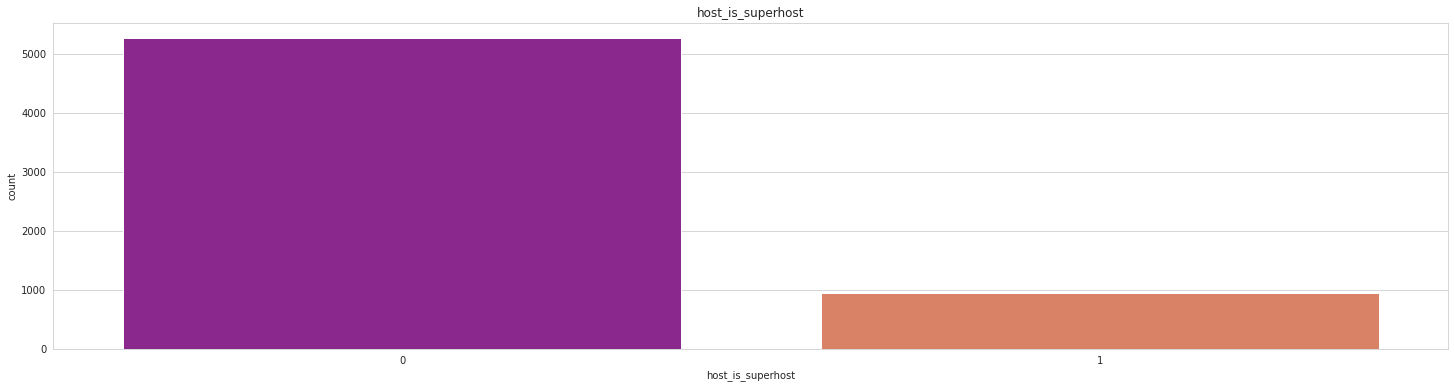

In [270]:
sns.countplot(df['host_is_superhost'], palette="plasma")
fig = plt.gcf()
fig.set_size_inches(25,6)
plt.title('host_is_superhost')

In [35]:
print(dfR.shape)
mask = ~dfR['comments'].str.contains('[a-zA-Z]')

# Use the mask to drop the rows that do not contain any alphabet characters
dfR = dfR[~mask]
dfR.shape

(243165, 6)


(242087, 6)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'host_response_time')

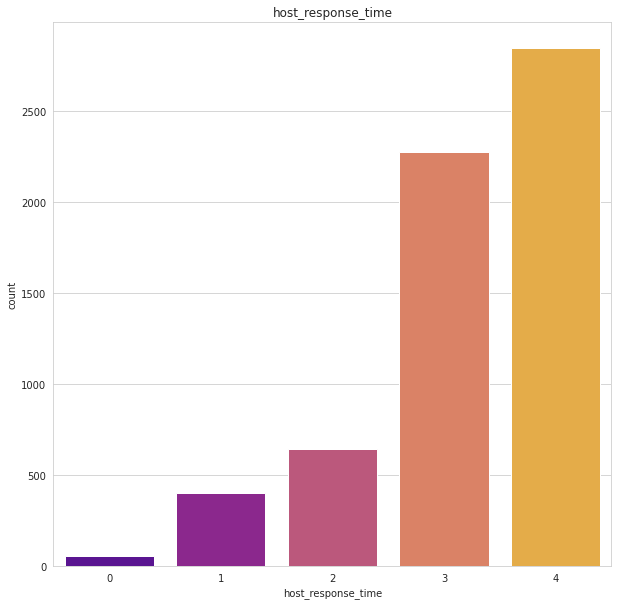

In [271]:
sns.countplot(df['host_response_time'], palette="plasma")
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('host_response_time')

In [36]:
dfR['comments'] = dfR['comments'].astype(str)
dfR['comments']=dfR['comments'].str.lower()
dfR['comments']=dfR['comments'].str.replace(r'[^\w\d\s]',' ')
dfR['comments']=dfR['comments'].str.replace(r'\s+',' ')

df['description'] = df['description'].astype(str)
df['description']=df['description'].str.lower()
df['description']=df['description'].str.replace(r'[^\w\d\s]',' ')
df['description']=df['description'].str.replace(r'\s+',' ')

df.sample(5)

<ipython-input-36-66bb6230a16f>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  dfR['comments']=dfR['comments'].str.replace(r'[^\w\d\s]',' ')
<ipython-input-36-66bb6230a16f>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  dfR['comments']=dfR['comments'].str.replace(r'\s+',' ')
<ipython-input-36-66bb6230a16f>:8: FutureWarning: The default value of regex will change from True to False in a future version.
  df['description']=df['description'].str.replace(r'[^\w\d\s]',' ')
<ipython-input-36-66bb6230a16f>:9: FutureWarning: The default value of regex will change from True to False in a future version.
  df['description']=df['description'].str.replace(r'\s+',' ')


,listing_id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
2333,19560736,https://www.airbnb.com/rooms/19560736,20220911231053,2022-09-12,previous scrape,MICK'S PLACE (TRIPLE ROOM),large triple room with 1 double and 1 single b...,My home is located a short 15 mins walk from L...,https://a0.muscache.com/pictures/b4c1502e-d13d...,56756879,https://www.airbnb.com/users/show/56756879,Michael,2016-01-30,"Dublin, Ireland",NaN,4,NaN,0.0,0,https://a0.muscache.com/im/pictures/user/6d225...,https://a0.muscache.com/im/pictures/user/6d225...,Clondalkin,4,6,"['email', 'phone']",t,1,118,South Dublin,53.34639,-6.39725,2,2,3,0,1.0,2.0,"[""Oven"", ""Dryer"", ""Hangers"", ""Indoor fireplace...",25.0,2,1125,2,2,1125,1125,2.0,1125.0,1,0,0,0,0,2022-09-12,87,0,0,2017-08-28,2020-09-01,4.76,4.93,4.76,4.92,4.91,4.30,4.77,0,4,0,4,0,1.42
3086,23636541,https://www.airbnb.com/rooms/23636541,20220911231053,2022-09-12,previous scrape,Beautiful Dublin City Centre home sleeps 5,terraced town house in dublin s city centre lo...,"Aviva stadium, the 3 Arena, grand canal, Shelb...",https://a0.muscache.com/pictures/87486933-728e...,44821116,https://www.airbnb.com/users/show/44821116,Charlotte,2015-09-22,NaN,NaN,4,NaN,NaN,0,https://a0.muscache.com/im/pictures/user/f6673...,https://a0.muscache.com/im/pictures/user/f6673...,Docklands,1,1,"['email', 'phone']",t,0,147,Dublin City,53.33930,-6.23444,0,0,5,0,3.0,3.0,"[""Oven"", ""Dryer"", ""Hangers"", ""Indoor fireplace...",175.0,1,1124,1,1,1124,1124,1.0,1124.0,1,0,0,0,0,2022-09-12,31,0,0,2018-03-11,2018-07-23,4.66,4.66,4.59,4.76,4.79,4.62,4.31,1,1,1,0,0,0.56
5677,50385818,https://www.airbnb.com/rooms/50385818,20220911231053,2022-09-12,previous scrape,"Recently renovated, bright 1-bed apartment",recently refurbished spacious apartment in bal...,NaN,https://a0.muscache.com/pictures/3e394f1d-6af6...,221435891,https://www.airbnb.com/users/show/221435891,Niall,2018-10-18,"County Dublin, Ireland",NaN,4,NaN,NaN,0,https://a0.muscache.com/im/pictures/user/13f55...,https://a0.muscache.com/im/pictures/user/13f55...,Bremore,1,2,"['email', 'phone']",t,0,389,Fingal,53.61472,-6.20428,0,0,2,0,1.0,1.0,"[""Essentials"", ""TV"", ""Fire extinguisher"", ""Han...",95.0,1,2,1,1,1125,1125,1.0,1125.0,1,0,0,0,0,2022-09-12,3,0,0,2021-07-18,2021-08-20,4.33,5.00,5.00,4.67,4.67,4.33,4.67,1,1,1,0,0,0.21
3352,25360138,https://www.airbnb.com/rooms/25360138,20220911231053,2022-09-12,previous scrape,Charming Townhouse in Amazing Location,charming townhouse in dublin with unique featu...,This neighbourhood is one of the best in Dubli...,https://a0.muscache.com/pictures/2299ac22-7c32...,11437877,https://www.airbnb.com/users/show/11437877,Lee,2014-01-19,"Dublin, Ireland",NaN,3,100.0,NaN,0,https://a0.muscache.com/im/users/11437877/prof...,https://a0.muscache.com/im/users/11

In [37]:
def calculateSentimentScore(text):
    text_blob = TextBlob(text)
    return text_blob.sentiment.polarity

dfR['sentiment_score'] = dfR['comments'].apply(calculateSentimentScore)
df['sentiment_score_description'] = df['description'].apply(calculateSentimentScore)

In [38]:
column = 'review_scores_rating'
df[column] = MinMaxScaler().fit_transform(np.array(df[column]).reshape(-1,1))

In [39]:
df['number_of_amenities'] = df['amenities'].apply(len)
print(len(df['number_of_amenities']))
print(np.max(df['number_of_amenities']))

df['number_of_amenities'] = pd.cut(df['number_of_amenities'], bins=[0, 300, 600, 900, 1200, 1500, 1800], labels=[0, 1, 2, 3, 4, 5])
df['number_of_amenities'] = pd.to_numeric(df['number_of_amenities'])

6209
1438


In [40]:
df['neighborhood_overview'].replace('', 'Neighborhood Overview Text', inplace=True)
df['host_about'].replace('', 'Neighborhood Overview Text', inplace=True)
df.shape

(6209, 73)

In [41]:
column_names2 = dfR.columns.tolist()
print(column_names2)
s2 = []
for i in column_names2:
  has_nan2 = dfR[i].isnull().any()
  s2.append(str(has_nan2))
print(s2)

['listing_id', 'id', 'date', 'reviewer_id', 'reviewer_name', 'comments', 'sentiment_score']
['False', 'False', 'False', 'False', 'False', 'False', 'False']


In [188]:
# The features that seem to be relevant when predicting the review scores are extracted
dfNew = df[['listing_id', 'name', 'description', 'amenities', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_listings_count', 'host_total_listings_count', 'host_identity_verified', 'host_is_superhost', 'neighbourhood', 'property_type', 'room_type', 'accommodates', 'bathrooms_text', 'bedrooms', 'beds', 'price', 'minimum_nights', 'maximum_nights', 'number_of_reviews', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value',
 'minimum_minimum_nights',
 'maximum_minimum_nights',
 'minimum_maximum_nights',
 'maximum_maximum_nights',
 'minimum_nights_avg_ntm',
 'maximum_nights_avg_ntm',
 'availability_30',
 'availability_60',
 'availability_90',
 'availability_365',
 'number_of_reviews',
 'number_of_reviews_ltm',
 'number_of_reviews_l30d',
 'calculated_host_listings_count',
 'calculated_host_listings_count_entire_homes',
 'calculated_host_listings_count_private_rooms',
 'calculated_host_listings_count_shared_rooms',
 'reviews_per_month',
 'instant_bookable',
 'has_availability',
 'sentiment_score_description',
 'review_scores_rating']]
dfNew.sample(1)

,listing_id,name,description,amenities,host_response_time,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,host_identity_verified,host_is_superhost,neighbourhood,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,price,minimum_nights,maximum_nights,number_of_reviews,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,instant_bookable,has_availability,sentiment_score_description,review_scores_rating
874,10207081,"2 Bed, 2 Bath apt, 12km from City",2 bedroom 1 ensuite 2 bathroom apartment locat...,"[""TV with standard cable"", ""Essentials"", ""Drye...",4,NaN,NaN,1,1,1,0,389,0,0,5,0,2.0,2.0,155.0,3,1125,23,4.83,4.65,5.0,4.96,4.22,4.57,3,3,1125,1125,3.0,1125.0,0,0,0,0,23,0,0,1,1,0,0,0.28,0,1,0.165385,0.904


In [189]:
print(dfNew['host_response_rate'].dtype)

float64


In [191]:
from sklearn.impute import SimpleImputer
# dfNew['host_response_rate'] = dfNew['host_response_rate'][~df['host_response_rate'].isna()].astype
simpleImputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
dfNew['host_response_rate'] = simpleImputer.fit_transform(dfNew['host_response_rate'].values.reshape(-1,1))
dfNew['host_acceptance_rate'] = simpleImputer.fit_transform(dfNew['host_acceptance_rate'].values.reshape(-1,1))
dfNew['bedrooms'] = simpleImputer.fit_transform(dfNew['bedrooms'].values.reshape(-1,1))
dfNew['beds'] = simpleImputer.fit_transform(dfNew['beds'].values.reshape(-1,1))
dfNew['review_scores_accuracy'] = simpleImputer.fit_transform(dfNew['review_scores_accuracy'].values.reshape(-1,1))
dfNew['review_scores_cleanliness'] = simpleImputer.fit_transform(dfNew['review_scores_cleanliness'].values.reshape(-1,1))
dfNew['review_scores_checkin'] = simpleImputer.fit_transform(dfNew['review_scores_checkin'].values.reshape(-1,1))
dfNew['review_scores_communication'] = simpleImputer.fit_transform(dfNew['review_scores_communication'].values.reshape(-1,1))
dfNew['review_scores_location'] = simpleImputer.fit_transform(dfNew['review_scores_location'].values.reshape(-1,1))
dfNew['review_scores_value'] = simpleImputer.fit_transform(dfNew['review_scores_value'].values.reshape(-1,1))
dfNew.sample(1)

<ipython-input-191-1cd14e077250>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfNew['host_response_rate'] = simpleImputer.fit_transform(dfNew['host_response_rate'].values.reshape(-1,1))
<ipython-input-191-1cd14e077250>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfNew['host_acceptance_rate'] = simpleImputer.fit_transform(dfNew['host_acceptance_rate'].values.reshape(-1,1))
<ipython-input-191-1cd14e077250>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


,listing_id,name,description,amenities,host_response_time,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,host_identity_verified,host_is_superhost,neighbourhood,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,price,minimum_nights,maximum_nights,number_of_reviews,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,instant_bookable,has_availability,sentiment_score_description,review_scores_rating
2470,20151955,Cozy bedroom in the heart of the city centre.,cozy double bedroom in the heart of the city c...,"[""Oven"", ""Fire extinguisher"", ""Dryer"", ""Hanger...",3,100.0,100.0,2,2,1,0,389,2,2,2,0,1.0,2.0,70.0,3,1125,76,4.83,4.84,4.8,4.88,4.92,4.68,3,3,1125,1125,3.0,1125.0,0,0,0,0,76,0,0,2,0,2,0,1.26,0,1,-0.1,0.972


In [192]:
column_names = dfNew.columns.tolist()
print(column_names)

s = []
for i in column_names:
  has_nan = dfNew[i].isnull().any()
  s.append(str(has_nan))
print(s)
dfNew.sample(1)

result = []
for i, x in enumerate(s):
  if x=='True':
    result.append(i)
print(result)
x = dfNew.columns
for i in result:
  print(x[i])

['listing_id', 'name', 'description', 'amenities', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_listings_count', 'host_total_listings_count', 'host_identity_verified', 'host_is_superhost', 'neighbourhood', 'property_type', 'room_type', 'accommodates', 'bathrooms_text', 'bedrooms', 'beds', 'price', 'minimum_nights', 'maximum_nights', 'number_of_reviews', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_list

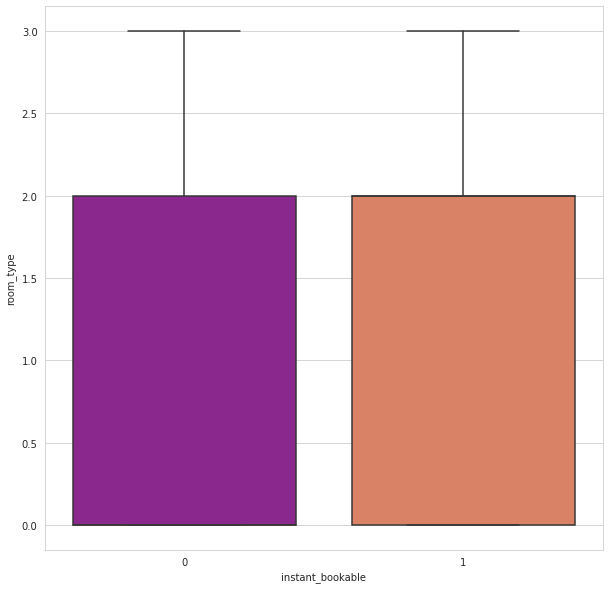

In [277]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(data=df, x='instant_bookable',y='room_type',palette='plasma')

In [193]:
dfJoined = dfNew.join(dfR.set_index("listing_id"),on="listing_id",how="inner", lsuffix='_left', rsuffix='_right')
print(dfJoined.shape)
dfJoined.head()

(242087, 56)


,listing_id,name,description,amenities,host_response_time,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,host_identity_verified,host_is_superhost,neighbourhood,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,price,minimum_nights,maximum_nights,number_of_reviews,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,instant_bookable,has_availability,sentiment_score_description,review_scores_rating,id,date,reviewer_id,reviewer_name,comments,sentiment_score
0,44077,cosy comfortable Irish cottage twin,our house was built in 1937 when there was ple...,"[""Oven"", ""Hot water kettle"", ""Fire extinguishe...",3,100.0,99.0,2,2,1,1,57,2,2,2,0,1.0,2.0,70.0,3,1125,258,4.83,4.74,4.93,4.93,4.66,4.82,3,3,1125,1125,3.0,1125.0,2,11,18,104,258,31,7,2,0,2,0,1.85,0,1,0.334398,0.956,203703,2011-03-20,393348,Christian,we enjoyed our stay very much the room was com...,0.314074
0,44077,cosy comfortable Irish cottage twin,our house was built in 1937 when there was ple...,"[""Oven"", ""Hot water kettle"", ""Fire extinguishe...",3,100.0,99.0,2,2,1,1,57,2,2,2,0,1.0,2.0,70.0,3,1125,258,4.83,4.74,4.93,4.93,4.66,4.82,3,3,1125,1125,3.0,1125.0,2,11,18,104,258,31,7,2,0,2,0,1.85,0,1,0.334398,0.956,211369,2011-03-28,444004,Solidea,we have been here 4 nights stay in a home is t...,0.528571
0,44077,cosy comfortable Irish cottage twin,our house was built in 1937 when there was ple...,"[""Oven"", ""Hot water kettle"", ""Fire extinguishe...",3,100.0,99.0,2,2,1,1,57,2,2,2,0,1.0,2.0,70.0,3,1125,258,4.83,4.74,4.93,4.93,4.66,4.82,3,3,1125,1125,3.0,1125.0,2,11,18,104,258,31,7,2,0,2,0,1.85,0,1,0.334398,0.956,234215,2011-04-21,465058,Michael And Isabelle,teresa and hughie were great hosts they were v...,0.442308
0,44077,cosy comfortable Irish cottage twin,our house was built in 1937 when there was ple...,"[""Oven"", ""Hot water kettle"", ""Fire extinguishe...",3,100.0,99.0,2,2,1,1,57,2,2,2,0,1.0,2.0,70.0,3,1125,258,4.83,4.74,4.93,4.93,4.66,4.82,3,3,1125,1125,3.0,1125.0,2,11,18,104,258,31,7,2,0,2,0,1.85,0,1,0.334398,0.956,261843,2011-05-13,490005,Weston,no surprises was as described very gracious ho...,0.575000
0,44077,cosy comfortable Irish cottage twin,our house was built in 1937 when there was ple...,"[""Oven"", ""Hot water kettle"", ""Fire extinguishe...",3,100.0,99.0,2,2,1,1,57,2,2,2,0,1.0,2.0,70.0,3,1125,258,4.83,4.74,4.93,4.93,4.66,4.82,3,3,1125,1125,3.0,1125.0,2,11,18,104,258,31,7,2,0,2,0,1.85,0,1,0.334398,0.956,268148,2011-05-17,520460,Barbara,teresa was a lovely hostess and we had a delig...,0.401786


In [282]:
# The features that seem to be relevant when predicting the review scores are extracted
df2 = dfJoined[['listing_id', 'comments', 'name', 'description', 'amenities','host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_listings_count', 'host_total_listings_count', 'host_identity_verified', 'host_is_superhost', 'neighbourhood', 'property_type', 'room_type', 'accommodates', 'bathrooms_text', 'bedrooms', 'beds', 'price', 'minimum_nights', 'maximum_nights', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value',
 'minimum_minimum_nights',
 'maximum_minimum_nights',
 'minimum_maximum_nights',
 'maximum_maximum_nights',
 'minimum_nights_avg_ntm',
 'maximum_nights_avg_ntm',
 'availability_30',
 'availability_60',
 'availability_90',
 'availability_365',
 'number_of_reviews',
 'number_of_reviews_ltm',
 'number_of_reviews_l30d',
 'calculated_host_listings_count',
 'calculated_host_listings_count_entire_homes',
 'calculated_host_listings_count_private_rooms',
 'calculated_host_listings_count_shared_rooms',
 'reviews_per_month',
 'instant_bookable',
 'has_availability',
 'sentiment_score',
 'sentiment_score_description',
 'review_scores_rating']]
df2.head()

,listing_id,comments,name,description,amenities,host_response_time,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,host_identity_verified,host_is_superhost,neighbourhood,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,price,minimum_nights,maximum_nights,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,instant_bookable,has_availability,sentiment_score,sentiment_score_description,review_scores_rating
0,44077,we enjoyed our stay very much the room was com...,cosy comfortable Irish cottage twin,our house was built in 1937 when there was ple...,"[""Oven"", ""Hot water kettle"", ""Fire extinguishe...",3,100.0,99.0,2,2,1,1,57,2,2,2,0,1.0,2.0,70.0,3,1125,4.83,4.74,4.93,4.93,4.66,4.82,3,3,1125,1125,3.0,1125.0,2,11,18,104,258,258,31,7,2,0,2,0,1.85,0,1,0.314074,0.334398,0.956
0,44077,we have been here 4 nights stay in a home is t...,cosy comfortable Irish cottage twin,our house was built in 1937 when there was ple...,"[""Oven"", ""Hot water kettle"", ""Fire extinguishe...",3,100.0,99.0,2,2,1,1,57,2,2,2,0,1.0,2.0,70.0,3,1125,4.83,4.74,4.93,4.93,4.66,4.82,3,3,1125,1125,3.0,1125.0,2,11,18,104,258,258,31,7,2,0,2,0,1.85,0,1,0.528571,0.334398,0.956
0,44077,teresa and hughie were great hosts they were v...,cosy comfortable Irish cottage twin,our house was built in 1937 when there was ple...,"[""Oven"", ""Hot water kettle"", ""Fire extinguishe...",3,100.0,99.0,2,2,1,1,57,2,2,2,0,1.0,2.0,70.0,3,1125,4.83,4.74,4.93,4.93,4.66,4.82,3,3,1125,1125,3.0,1125.0,2,11,18,104,258,258,31,7,2,0,2,0,1.85,0,1,0.442308,0.334398,0.956
0,44077,no surprises was as described very gracious ho...,cosy comfortable Irish cottage twin,our house was built in 1937 when there was ple...,"[""Oven"", ""Hot water kettle"", ""Fire extinguishe...",3,100.0,99.0,2,2,1,1,57,2,2,2,0,1.0,2.0,70.0,3,1125,4.83,4.74,4.93,4.93,4.66,4.82,3,3,1125,1125,3.0,1125.0,2,11,18,104,258,258,31,7,2,0,2,0,1.85,0,1,0.575000,0.334398,0.956
0,44077,teresa was a lovely hostess and we had a delig...,cosy comfortable Irish cottage twin,our house was built in 1937 when there was ple...,"[""Oven"", ""Hot water kettle"", ""Fire extinguishe...",3,100.0,99.0,2,2,1,1,57,2,2,2,0,1.0,2.0,70.0,3,1125,4.83,4.74,4.93,4.93,4.66,4.82,3,3,1125,1125,3.0,1125.0,2,11,18,104,258,258,31,7,2,0,2,0,1.85,0,1,0.401786,0.334398,0.956


In [283]:
# from langdetect import detect
# for index, row in dfR.iterrows():
#     # Detect the language of the text in the 'column_name' column
#     lang = detect(row['comments'])
#     print(f'Row {index}: Language = {lang}')

In [284]:
# df2['language'] = df2['comments'].apply(detect)
# print(df2['language'].unique())
df2 = df2.reset_index()
df2.head()

,index,listing_id,comments,name,description,amenities,host_response_time,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,host_identity_verified,host_is_superhost,neighbourhood,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,price,minimum_nights,maximum_nights,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,instant_bookable,has_availability,sentiment_score,sentiment_score_description,review_scores_rating
0,0,44077,we enjoyed our stay very much the room was com...,cosy comfortable Irish cottage twin,our house was built in 1937 when there was ple...,"[""Oven"", ""Hot water kettle"", ""Fire extinguishe...",3,100.0,99.0,2,2,1,1,57,2,2,2,0,1.0,2.0,70.0,3,1125,4.83,4.74,4.93,4.93,4.66,4.82,3,3,1125,1125,3.0,1125.0,2,11,18,104,258,258,31,7,2,0,2,0,1.85,0,1,0.314074,0.334398,0.956
1,0,44077,we have been here 4 nights stay in a home is t...,cosy comfortable Irish cottage twin,our house was built in 1937 when there was ple...,"[""Oven"", ""Hot water kettle"", ""Fire extinguishe...",3,100.0,99.0,2,2,1,1,57,2,2,2,0,1.0,2.0,70.0,3,1125,4.83,4.74,4.93,4.93,4.66,4.82,3,3,1125,1125,3.0,1125.0,2,11,18,104,258,258,31,7,2,0,2,0,1.85,0,1,0.528571,0.334398,0.956
2,0,44077,teresa and hughie were great hosts they were v...,cosy comfortable Irish cottage twin,our house was built in 1937 when there was ple...,"[""Oven"", ""Hot water kettle"", ""Fire extinguishe...",3,100.0,99.0,2,2,1,1,57,2,2,2,0,1.0,2.0,70.0,3,1125,4.83,4.74,4.93,4.93,4.66,4.82,3,3,1125,1125,3.0,1125.0,2,11,18,104,258,258,31,7,2,0,2,0,1.85,0,1,0.442308,0.334398,0.956
3,0,44077,no surprises was as described very gracious ho...,cosy comfortable Irish cottage twin,our house was built in 1937 when there was ple...,"[""Oven"", ""Hot water kettle"", ""Fire extinguishe...",3,100.0,99.0,2,2,1,1,57,2,2,2,0,1.0,2.0,70.0,3,1125,4.83,4.74,4.93,4.93,4.66,4.82,3,3,1125,1125,3.0,1125.0,2,11,18,104,258,258,31,7,2,0,2,0,1.85,0,1,0.575000,0.334398,0.956
4,0,44077,teresa was a lovely hostess and we had a delig...,cosy comfortable Irish cottage twin,our house was built in 1937 when there was ple...,"[""Oven"", ""Hot water kettle"", ""Fire extinguishe...",3,100.0,99.0,2,2,1,1,57,2,2,2,0,1.0,2.0,70.0,3,1125,4.83,4.74,4.93,4.93,4.66,4.82,3,3,1125,1125,3.0,1125.0,2,11,18,104,258,258,31,7,2,0,2,0,1.85,0,1,0.401786,0.334398,0.956


In [285]:
# language_codes = ['en', 'fr', 'de', 'es', 'it', 'nl', 'sw', 'pt', 'et', 'ca', 'ro', 'no', 'cs', 'pl', 'sv', 'zh-cn', 'sk', 'so', 'tr', 'da', 'af', 'fi', 'vi', 'hr', 'ru', 'el', 'tl', 'ko', 'ja', 'id', 'hu', 'sl', 'cy', 'he', 'sq', 'lt', 'uk', 'lv']

# # Download the stopwords for all the languages in the list
# for code in language_codes:
#     nltk.download('stopwords', code)

# # The stopwords can then be accessed using the words() function
# english_stopwords = stopwords.words('english')
# spanish_stopwords = stopwords.words('spanish')
# french_stopwords = stopwords.words('french')
# german_stopwords = stopwords.words('german')
# italian_stopwords = stopwords.words('italian')
# dutch_stopwords = stopwords.words('dutch')
# # swahili_stopwords = stopwords.words('swahili')
# portuguese_stopwords = stopwords.words('portuguese')
# # estonian_stopwords = stopwords.words('estonian')
# catalan_stopwords = stopwords.words('catalan')
# romanian_stopwords = stopwords.words('romanian')
# norwegian_stopwords = stopwords.words('norwegian')
# # czech_stopwords = stopwords.words('czech')
# # polish_stopwords = stopwords.words('polish')
# swedish_stopwords = stopwords.words('swedish')
# chinese_stopwords = stopwords.words('chinese')
# # slovak_stopwords = stopwords.words('slovak')
# # somali_stopwords = stopwords.words('somali')
# turkish_stopwords = stopwords.words('turkish')
# danish_stopwords = stopwords.words('danish')
# # afrikaans_stopwords = stopwords.words('afrikaans')
# finnish_stopwords = stopwords.words('finnish')
# # vietnamese_stopwords = stopwords.words('vietnamese')
# # croatian_stopwords = stopwords.words('croatian')
# russian_stopwords = stopwords.words('russian')
# greek_stopwords = stopwords.words('greek')
# # tagalog_stopwords = stopwords.words('tagalog')
# # korean_stopwords = stopwords.words('korean')
# # japanese_stopwords = stopwords.words('japanese')
# indonesian_stopwords = stopwords.words('indonesian')
# hungarian_stopwords = stopwords.words('hungarian')
# # slovenian_stopwords = stopwords.words('slovenian')
# # welsh_stopwords = stopwords.words('welsh')
# hebrew_stopwords = stopwords.words('hebrew')
# # albanian_stopwords = stopwords.words('albanian')
# # lithuanian_stopwords = stopwords.words('lithuanian')
# # ukrainian_stopwords = stopwords.words('ukrainian')
# # latvian_stopwords = stopwords.words('latvian')

# stopWordLanguages = [english_stopwords, spanish_stopwords, french_stopwords, german_stopwords, italian_stopwords, dutch_stopwords, portuguese_stopwords, catalan_stopwords, romanian_stopwords, norwegian_stopwords, swedish_stopwords, chinese_stopwords, turkish_stopwords, danish_stopwords, finnish_stopwords, russian_stopwords, greek_stopwords, indonesian_stopwords, hungarian_stopwords, hebrew_stopwords]


In [286]:
# print(df2.shape)
# mask = ~df2['comments'].str.contains('[a-zA-Z]')

# # Use the mask to drop the rows that do not contain any alphabet characters
# df2 = df2[~mask]
# df2.shape

In [287]:
df2 = df2.drop(['index'], axis=1)
df2.head()

,listing_id,comments,name,description,amenities,host_response_time,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,host_identity_verified,host_is_superhost,neighbourhood,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,price,minimum_nights,maximum_nights,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,instant_bookable,has_availability,sentiment_score,sentiment_score_description,review_scores_rating
0,44077,we enjoyed our stay very much the room was com...,cosy comfortable Irish cottage twin,our house was built in 1937 when there was ple...,"[""Oven"", ""Hot water kettle"", ""Fire extinguishe...",3,100.0,99.0,2,2,1,1,57,2,2,2,0,1.0,2.0,70.0,3,1125,4.83,4.74,4.93,4.93,4.66,4.82,3,3,1125,1125,3.0,1125.0,2,11,18,104,258,258,31,7,2,0,2,0,1.85,0,1,0.314074,0.334398,0.956
1,44077,we have been here 4 nights stay in a home is t...,cosy comfortable Irish cottage twin,our house was built in 1937 when there was ple...,"[""Oven"", ""Hot water kettle"", ""Fire extinguishe...",3,100.0,99.0,2,2,1,1,57,2,2,2,0,1.0,2.0,70.0,3,1125,4.83,4.74,4.93,4.93,4.66,4.82,3,3,1125,1125,3.0,1125.0,2,11,18,104,258,258,31,7,2,0,2,0,1.85,0,1,0.528571,0.334398,0.956
2,44077,teresa and hughie were great hosts they were v...,cosy comfortable Irish cottage twin,our house was built in 1937 when there was ple...,"[""Oven"", ""Hot water kettle"", ""Fire extinguishe...",3,100.0,99.0,2,2,1,1,57,2,2,2,0,1.0,2.0,70.0,3,1125,4.83,4.74,4.93,4.93,4.66,4.82,3,3,1125,1125,3.0,1125.0,2,11,18,104,258,258,31,7,2,0,2,0,1.85,0,1,0.442308,0.334398,0.956
3,44077,no surprises was as described very gracious ho...,cosy comfortable Irish cottage twin,our house was built in 1937 when there was ple...,"[""Oven"", ""Hot water kettle"", ""Fire extinguishe...",3,100.0,99.0,2,2,1,1,57,2,2,2,0,1.0,2.0,70.0,3,1125,4.83,4.74,4.93,4.93,4.66,4.82,3,3,1125,1125,3.0,1125.0,2,11,18,104,258,258,31,7,2,0,2,0,1.85,0,1,0.575000,0.334398,0.956
4,44077,teresa was a lovely hostess and we had a delig...,cosy comfortable Irish cottage twin,our house was built in 1937 when there was ple...,"[""Oven"", ""Hot water kettle"", ""Fire extinguishe...",3,100.0,99.0,2,2,1,1,57,2,2,2,0,1.0,2.0,70.0,3,1125,4.83,4.74,4.93,4.93,4.66,4.82,3,3,1125,1125,3.0,1125.0,2,11,18,104,258,258,31,7,2,0,2,0,1.85,0,1,0.401786,0.334398,0.956


In [288]:
# df2['comments'] = df2['comments'].astype(str)
# df2['comments']=df2['comments'].str.lower()
# # Remove Punctuations
# df2['comments']=df2['comments'].str.replace(r'[^\w\d\s]',' ')
# #Remove the whitespaces
# df2['comments']=df2['comments'].str.replace(r'\s+',' ')

In [289]:
# df2['description'] = df2['description'].astype(str)
# df2['description']=df2['description'].str.lower()
# # Remove Punctuations
# df2['description']=df2['description'].str.replace(r'[^\w\d\s]',' ')
# #Remove the whitespaces
# df2['description']=df2['description'].str.replace(r'\s+',' ')

# df2.sample(5)

In [290]:
# def calculateSentimentScore(text):
#     # Create a TextBlob object from the text
#     text_blob = TextBlob(text)
    
#     # Return the sentiment polarity
#     return text_blob.sentiment.polarity

# # Calculate the sentiment scores for the review text
# df2['sentiment_score'] = df2['comments'].apply(calculateSentimentScore)
# df2['sentiment_score_description'] = df2['description'].apply(calculateSentimentScore)


In [291]:
# column = 'review_scores_rating'
# df2[column] = MinMaxScaler().fit_transform(np.array(df2[column]).reshape(-1,1))

In [292]:
df2.sample(5)

,listing_id,comments,name,description,amenities,host_response_time,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,host_identity_verified,host_is_superhost,neighbourhood,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,price,minimum_nights,maximum_nights,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,instant_bookable,has_availability,sentiment_score,sentiment_score_description,review_scores_rating
26775,4963289,we stayed there for 3 nights and decided to st...,"Exquisite Private Suite in Malahide, Dublin.",the house is a comfortable family home close t...,"[""Hot water kettle"", ""Dining table"", ""Hangers""...",3,100.0,97.0,1,1,1,1,271,2,2,2,0,1.0,1.0,83.0,1,1125,4.96,4.98,4.99,4.99,4.95,4.91,1,1,1125,1125,1.0,1125.0,4,15,38,59,467,467,96,9,1,0,1,0,5.08,0,1,0.350000,0.272619,0.986
143410,21350202,i stayed in the apartment for 3 nights with my...,Luxury George Street's apartment (City Centre)+.,stunningly designed spacious double ensuite ro...,"[""Essentials"", ""Private entrance"", ""Fire extin...",3,100.0,99.0,9,12,1,1,137,2,2,2,0,1.0,1.0,140.0,2,30,4.89,4.87,4.95,4.98,4.97,4.69,2,2,30,30,2.0,30.0,2,2,2,2,146,146,7,0,8,4,4,0,2.46,0,1,0.412667,0.234848,0.964
87410,14367732,the place was everything i d hoped for and so ...,Chic & Elegant Luxury in Inner City Center,our apartment is ideal for longer term multi w...,"[""Oven"", ""Hot water kettle"", ""Fire extinguishe...",3,100.0,98.0,3,4,1,0,176,0,0,4,0,1.0,2.0,229.0,14,1125,4.81,4.73,4.78,4.91,4.81,4.58,1,14,1125,1125,12.2,1125.0,0,4,17,281,408,408,66,3,3,3,0,0,5.57,0,1,0.600000,0.293750,0.942
149499,22506331,patsy was a wonderful host very welcoming and ...,Comfortable Accomodation in Dundrum,double room available in our home in dundrum d...,"[""Hot water kettle"", ""Fire extinguisher"", ""Din...",3,100.0,88.0,3,12,1,0,133,2,2,1,0,1.0,1.0,90.0,2,5,4.94,4.91,4.98,4.95,4.87,4.83,2,2,5,5,2.0,5.0,3,23,53,53,164,164,23,3,3,0,3,0,2.91,0,1,0.600000,0.045055,0.982
44585,7353069,we stayed at james caroline s place for one ni...,Double room near City and Croke Pk,comfortable room in cosy flat located 30 minut...,"[""Essentials"", ""Wifi"", ""Long term stays allowe...",4,100.0,100.0,1,1,0,0,389,2,2,2,0,1.0,1.0,50.0,6,1125,4.62,4.29,4.92,4.94,4.53,4.53,2,6,1125,1125,4.9,1125.0,0,0,0,0,53,53,0,0,1,0,1,0,0.61,0,1,0.352833,0.187500,0.920


In [293]:
cArr = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 500, 1000]

In [294]:
# df2['number_of_amenities'] = df2['amenities'].apply(len)
# print(len(df2['number_of_amenities']))
# print(np.max(df2['number_of_amenities']))

# df2['number_of_amenities'] = pd.cut(df2['number_of_amenities'], bins=[0, 300, 600, 900, 1200, 1500, 1800], labels=[0, 1, 2, 3, 4, 5])
# df2['number_of_amenities'] = pd.to_numeric(df2['number_of_amenities'])

# print(df2['number_of_amenities'])

In [295]:
# df2.head()

In [296]:
# df2['host_response_time'].fillna(round(df2['host_response_time'].mean()), inplace=True)
# df2['host_response_rate'].fillna(0, inplace=True)
# df2['host_acceptance_rate'].fillna(df2['host_acceptance_rate'].mean(), inplace=True)
# df2['host_listings_count'].fillna(df2['host_listings_count'].mean(), inplace=True)
# df2['host_total_listings_count'].fillna(df2['host_total_listings_count'].mean(), inplace=True)
# df2['host_identity_verified'].fillna(round(df2['host_identity_verified'].mean()), inplace=True)
# df2['host_is_superhost'].fillna(round(df2['host_is_superhost'].mean()), inplace=True)
# df2['neighbourhood'].fillna(round(df2['neighbourhood'].mean()), inplace=True)
# df2['property_type'].fillna(round(df2['property_type'].mean()), inplace=True)
# df2['room_type'].fillna(round(df2['room_type'].mean()), inplace=True)
# df2['accommodates'].fillna(df2['accommodates'].mean(), inplace=True)
# df2['bathrooms_text'].fillna(round(df2['bathrooms_text'].mean()), inplace=True)
# df2['bedrooms'].fillna(df2['bedrooms'].mean(), inplace=True)
# df2['beds'].fillna(df2['beds'].mean(), inplace=True)
# df2['price'].fillna(df2['price'].mean(), inplace=True)
# df2['minimum_nights'].fillna(df2['minimum_nights'].mean(), inplace=True)
# df2['maximum_nights'].fillna(df2['maximum_nights'].mean(), inplace=True)
# df2['number_of_reviews'].fillna(df2['number_of_reviews'].mean(), inplace=True)
# df2['review_scores_cleanliness'].fillna(df2['review_scores_cleanliness'].mean(), inplace=True)
# df2['review_scores_checkin'].fillna(df2['review_scores_checkin'].mean(), inplace=True)
# df2['review_scores_communication'].fillna(df2['review_scores_communication'].mean(), inplace=True)
# df2['review_scores_location'].fillna(df2['review_scores_location'].mean(), inplace=True)
# df2['review_scores_value'].fillna(df2['review_scores_value'].mean(), inplace=True)
# df2['minimum_minimum_nights'].fillna(df2['minimum_minimum_nights'].mean(), inplace=True)
# df2['maximum_minimum_nights'].fillna(df2['maximum_minimum_nights'].mean(), inplace=True)
# df2['minimum_maximum_nights'].fillna(df2['minimum_maximum_nights'].mean(), inplace=True)
# df2['maximum_maximum_nights'].fillna(df2['maximum_maximum_nights'].mean(), inplace=True)
# df2['minimum_nights_avg_ntm'].fillna(df2['minimum_nights_avg_ntm'].mean(), inplace=True)
# df2['maximum_nights_avg_ntm'].fillna(df2['maximum_nights_avg_ntm'].mean(), inplace=True)
# df2['availability_30'].fillna(df2['availability_30'].mean(), inplace=True)
# df2['availability_60'].fillna(df2['availability_60'].mean(), inplace=True)
# df2['availability_90'].fillna(df2['availability_90'].mean(), inplace=True)
# df2['availability_365'].fillna(df2['availability_365'].mean(), inplace=True)
# df2['number_of_reviews'].fillna(df2['number_of_reviews'].mean(), inplace=True)
# df2['number_of_reviews_ltm'].fillna(df2['number_of_reviews_ltm'].mean(), inplace=True)
# df2['number_of_reviews_l30d'].fillna(df2['number_of_reviews_l30d'].mean(), inplace=True)
# df2['calculated_host_listings_count'].fillna(df2['calculated_host_listings_count'].mean(), inplace=True)
# df2['calculated_host_listings_count_entire_homes'].fillna(df2['calculated_host_listings_count_entire_homes'].mean(), inplace=True)
# df2['calculated_host_listings_count_private_rooms'].fillna(df2['calculated_host_listings_count_private_rooms'].mean(), inplace=True)
# df2['calculated_host_listings_count_shared_rooms'].fillna(df2['calculated_host_listings_count_shared_rooms'].mean(), inplace=True)
# df2['reviews_per_month'].fillna(df2['reviews_per_month'].mean(), inplace=True)
# df2['instant_bookable'].fillna(round(df2['instant_bookable'].mean()), inplace=True)
# df2['has_availability'].fillna(round(df2['has_availability'].mean()), inplace=True)
# df2['sentiment_score'].fillna(df2['sentiment_score'].mean(), inplace=True)
# df2['sentiment_score_description'].fillna(df2['sentiment_score_description'].mean(), inplace=True)
# df2['number_of_amenities'].fillna((df2['number_of_amenities'].mean()), inplace=True)
# df2['review_scores_accuracy'].fillna(df2['review_scores_accuracy'].mean(), inplace=True)
# df2['review_scores_rating'].fillna(df2['review_scores_rating'].mean(), inplace=True)

In [297]:
# df2 = df2[["host_response_rate", "host_acceptance_rate", 'beds']].fillna(0, inplace=True)

In [298]:
# dfNew = df2

In [299]:
# dfNew.shape()

In [300]:
# df3 = dfNew.iloc[8:]
# df3 = df3.fillna(df3.mean())
# df3.shape

In [301]:
# df2 = df3

In [302]:
df_rating = df2
colRev = df_rating.pop('review_scores_rating')
df_rating.insert(len(df_rating.columns), 'review_scores_rating', colRev)
df_rating.head()

,listing_id,comments,name,description,amenities,host_response_time,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,host_identity_verified,host_is_superhost,neighbourhood,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,price,minimum_nights,maximum_nights,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,instant_bookable,has_availability,sentiment_score,sentiment_score_description,review_scores_rating
0,44077,we enjoyed our stay very much the room was com...,cosy comfortable Irish cottage twin,our house was built in 1937 when there was ple...,"[""Oven"", ""Hot water kettle"", ""Fire extinguishe...",3,100.0,99.0,2,2,1,1,57,2,2,2,0,1.0,2.0,70.0,3,1125,4.83,4.74,4.93,4.93,4.66,4.82,3,3,1125,1125,3.0,1125.0,2,11,18,104,258,258,31,7,2,0,2,0,1.85,0,1,0.314074,0.334398,0.956
1,44077,we have been here 4 nights stay in a home is t...,cosy comfortable Irish cottage twin,our house was built in 1937 when there was ple...,"[""Oven"", ""Hot water kettle"", ""Fire extinguishe...",3,100.0,99.0,2,2,1,1,57,2,2,2,0,1.0,2.0,70.0,3,1125,4.83,4.74,4.93,4.93,4.66,4.82,3,3,1125,1125,3.0,1125.0,2,11,18,104,258,258,31,7,2,0,2,0,1.85,0,1,0.528571,0.334398,0.956
2,44077,teresa and hughie were great hosts they were v...,cosy comfortable Irish cottage twin,our house was built in 1937 when there was ple...,"[""Oven"", ""Hot water kettle"", ""Fire extinguishe...",3,100.0,99.0,2,2,1,1,57,2,2,2,0,1.0,2.0,70.0,3,1125,4.83,4.74,4.93,4.93,4.66,4.82,3,3,1125,1125,3.0,1125.0,2,11,18,104,258,258,31,7,2,0,2,0,1.85,0,1,0.442308,0.334398,0.956
3,44077,no surprises was as described very gracious ho...,cosy comfortable Irish cottage twin,our house was built in 1937 when there was ple...,"[""Oven"", ""Hot water kettle"", ""Fire extinguishe...",3,100.0,99.0,2,2,1,1,57,2,2,2,0,1.0,2.0,70.0,3,1125,4.83,4.74,4.93,4.93,4.66,4.82,3,3,1125,1125,3.0,1125.0,2,11,18,104,258,258,31,7,2,0,2,0,1.85,0,1,0.575000,0.334398,0.956
4,44077,teresa was a lovely hostess and we had a delig...,cosy comfortable Irish cottage twin,our house was built in 1937 when there was ple...,"[""Oven"", ""Hot water kettle"", ""Fire extinguishe...",3,100.0,99.0,2,2,1,1,57,2,2,2,0,1.0,2.0,70.0,3,1125,4.83,4.74,4.93,4.93,4.66,4.82,3,3,1125,1125,3.0,1125.0,2,11,18,104,258,258,31,7,2,0,2,0,1.85,0,1,0.401786,0.334398,0.956


In [303]:
# print(df_rating.shape)
# df_rating['neighborhood_overview'].replace('', 'Neighborhood Overview Text', inplace=True)
# df_rating.shape

In [304]:
# df_rating['host_about'].replace('', 'Neighborhood Overview Text', inplace=True)
# df_rating.shape

In [305]:
# column_names = df_rating.columns.tolist()
# print(column_names)

In [306]:
# df_rating = df_rating.fillna(df_rating.mean())

In [307]:
# s = []
# for i in column_names:
#   has_nan = df_rating[i].isnull().any()
#   # Print the result
#   s.append(str(has_nan))
# print(s)
# # df_rating[59334]

In [308]:
# row_index = df_rating[df_rating.isnull().any(axis=1)].index[0]

# # Print the row that contains a NaN value
# print(df_rating.loc[row_index])

In [309]:
def check_invalid_values(df_rating):
    # Check for NaN values
    if df_rating.isnull().values.any():
        print("Input contains NaN values.")

    # Check for infinity values
    if df_rating.isin([float('inf'), float('-inf')]).values.any():
        print("Input contains infinity values.")

    # Check for values too large for dtype('float64')
    for col in df_rating.select_dtypes(include='float64').columns:
        if df_rating[col].abs().max() > 1.7976931348623157e+308:
            print(f"Input contains values too large for dtype('float64') in column '{col}'.")

check_invalid_values(df_rating)

In [310]:
# df_rating = df_rating.dropna()
X = df_rating.iloc[:, 5:-1]
y = df_rating.iloc[:, -1]

In [311]:
bestfeatures = SelectKBest(score_func=f_regression, k=40)
fit = bestfeatures.fit(X,y)
df2scores = pd.DataFrame(fit.scores_)
df2columns = pd.DataFrame(X.columns)

topFeatures = pd.concat([df2columns,df2scores],axis=1)
topFeatures.columns = ['Feature','Score']
print(topFeatures.nlargest(40,'Score'))

                                         Feature          Score
22                           review_scores_value  280215.885304
17                        review_scores_accuracy  279080.791865
18                     review_scores_cleanliness  229095.281358
20                   review_scores_communication  168797.990815
19                         review_scores_checkin  131973.652856
21                        review_scores_location   38667.740943
6                              host_is_superhost   34707.693784
42                              instant_bookable    3747.501985
44                               sentiment_score    3455.767192
37                calculated_host_listings_count    3030.798636
0                             host_response_time    2305.188170
4                      host_total_listings_count    1907.681022
40   calculated_host_listings_count_shared_rooms    1592.399738
3                            host_listings_count    1578.721466
39  calculated_host_listings_count_priva

In [312]:
# df2 = df2.dropna()

# X = df2.iloc[:, 7:-1]
# y = df2.iloc[:, -1] 

# Split the data into training and testing sets

# Create a LinearRegression model
# modelLinearNew = LinearRegression()

# # Train the model on the training data
# modelLinearNew.fit(X_train, y_train)

# # Predict the ratings for the testing data
# y_pred_new = modelLinearNew.predict(X_test)

# # Calculate the model's accuracy
# accuracyNew = modelLinearNew.score(X_test, y_test)
# print(f'Accuracy: {accuracyNew:.2f}')

In [313]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [314]:
# for c in cArr:
#   modelLassoNew = Lasso(alpha=(1/2*c))
#   modelLassoNew.fit(X_train, y_train)
#   yPredLassoNew = modelLassoNew.predict(X_test)

#   accuracyLassoNew = modelLassoNew.score(X_test, y_test)
#   print(f'\nFor Lasso C = {c} :')
#   print(f'Accuracy for Lasso: {accuracyLassoNew:.2f}')

In [315]:
# for c in cArr:
#   modelRidgeNew = Ridge(alpha=(1/(2*c))) 
#   modelRidgeNew.fit(X_train, y_train)
#   yPredRidgeNew = modelRidgeNew.predict(X_test)

#   accuracyRidgeNew = modelRidgeNew.score(X_test, y_test)
#   print(f'\nFor Ridge C = {c} :')
#   print(f'Accuracy for Ridge: {accuracyRidgeNew:.2f}')

In [316]:
# modelDecisionTreeRegressorNew = DecisionTreeRegressor()
# modelDecisionTreeRegressorNew.fit(X_train, y_train)

# ypredDecisionTreeRegressorNew = modelDecisionTreeRegressorNew.predict(X_test)

# accuracyDecisionTreeRegressorNew = modelDecisionTreeRegressorNew.score(X_test, y_test)
# print(ypredDecisionTreeRegressorNew)
# print(f'Accuracy: {accuracyDecisionTreeRegressorNew:.2f}')

In [317]:
# modelRandomForestRegressorNew = RandomForestRegressor()

# # Train the model on the data
# modelRandomForestRegressorNew.fit(X_train, y_train)

# yPredmodelRandomForestRegressorNew = modelRandomForestRegressorNew.predict(X_test)

# accuracyRandomForestRegressorNew = modelRandomForestRegressorNew.score(X_test, y_test)
# print(yPredmodelRandomForestRegressorNew)
# print(f'Accuracy: {accuracyDecisionTreeRegressorNew:.2f}')

In [318]:
df_rating.shape

(242087, 52)

In [319]:
# # Create a model
# model = LinearRegression()

# # Perform cross-validation
# scores = cross_val_score(model, X, y, cv=5)

# # Print the scores
# print(scores)

In [320]:
# modelRandomForestRegressorNew = RandomForestRegressor()

# # Perform cross-validation
# scores = cross_val_score(modelRandomForestRegressorNew, X, y, cv=5)

# # Print the scores
# print(scores)

In [321]:
# modelDecisionTreeRegressorNew = DecisionTreeRegressor()

# # Perform cross-validation
# scores = cross_val_score(modelDecisionTreeRegressorNew, X, y, cv=5)

# # Print the scores
# print(scores)

In [322]:
# for c in cArr:
#   modelRidgeNew = Ridge(alpha=(1/(2*c))) 

#   # Perform cross-validation
#   scores = cross_val_score(modelRidgeNew, X, y, cv=5)

#   # Print the scores
#   print(f'\nFor Ridge C = {c} :')
#   print(f'These are the scores: {scores}')

In [323]:
# for c in cArr:
#   modelLassoNew = Lasso(alpha=(1/2*c))

#   # Perform cross-validation
#   scores = cross_val_score(modelLassoNew, X, y, cv=5)

#   # Print the scores
#   print(f'\nFor Lasso C = {c} :')
#   print(f'These are the scores: {scores}')

In [324]:
df_without_review_scores_cols = df_rating.drop(['host_is_superhost', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value'], axis=1)
df_without_review_scores_cols.head()

,listing_id,comments,name,description,amenities,host_response_time,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,host_identity_verified,neighbourhood,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,instant_bookable,has_availability,sentiment_score,sentiment_score_description,review_scores_rating
0,44077,we enjoyed our stay very much the room was com...,cosy comfortable Irish cottage twin,our house was built in 1937 when there was ple...,"[""Oven"", ""Hot water kettle"", ""Fire extinguishe...",3,100.0,99.0,2,2,1,57,2,2,2,0,1.0,2.0,70.0,3,1125,3,3,1125,1125,3.0,1125.0,2,11,18,104,258,258,31,7,2,0,2,0,1.85,0,1,0.314074,0.334398,0.956
1,44077,we have been here 4 nights stay in a home is t...,cosy comfortable Irish cottage twin,our house was built in 1937 when there was ple...,"[""Oven"", ""Hot water kettle"", ""Fire extinguishe...",3,100.0,99.0,2,2,1,57,2,2,2,0,1.0,2.0,70.0,3,1125,3,3,1125,1125,3.0,1125.0,2,11,18,104,258,258,31,7,2,0,2,0,1.85,0,1,0.528571,0.334398,0.956
2,44077,teresa and hughie were great hosts they were v...,cosy comfortable Irish cottage twin,our house was built in 1937 when there was ple...,"[""Oven"", ""Hot water kettle"", ""Fire extinguishe...",3,100.0,99.0,2,2,1,57,2,2,2,0,1.0,2.0,70.0,3,1125,3,3,1125,1125,3.0,1125.0,2,11,18,104,258,258,31,7,2,0,2,0,1.85,0,1,0.442308,0.334398,0.956
3,44077,no surprises was as described very gracious ho...,cosy comfortable Irish cottage twin,our house was built in 1937 when there was ple...,"[""Oven"", ""Hot water kettle"", ""Fire extinguishe...",3,100.0,99.0,2,2,1,57,2,2,2,0,1.0,2.0,70.0,3,1125,3,3,1125,1125,3.0,1125.0,2,11,18,104,258,258,31,7,2,0,2,0,1.85,0,1,0.575000,0.334398,0.956
4,44077,teresa was a lovely hostess and we had a delig...,cosy comfortable Irish cottage twin,our house was built in 1937 when there was ple...,"[""Oven"", ""Hot water kettle"", ""Fire extinguishe...",3,100.0,99.0,2,2,1,57,2,2,2,0,1.0,2.0,70.0,3,1125,3,3,1125,1125,3.0,1125.0,2,11,18,104,258,258,31,7,2,0,2,0,1.85,0,1,0.401786,0.334398,0.956


In [325]:
df_without_review_scores_cols = df_without_review_scores_cols.dropna()

In [326]:
df_without_review_scores_cols.shape

(242087, 45)

In [327]:
X = df_without_review_scores_cols.iloc[:, 5:-1]
y = df_without_review_scores_cols.iloc[:, -1]

In [329]:
bestfeatures = SelectKBest(score_func=f_regression, k=39)
fit = bestfeatures.fit(X,y)
df2scores = pd.DataFrame(fit.scores_)
df2columns = pd.DataFrame(X.columns)

topFeatures = pd.concat([df2columns,df2scores],axis=1)
topFeatures.columns = ['Feature','Score']
print(topFeatures.nlargest(39,'Score'))

                                         Feature        Score
35                              instant_bookable  3747.501985
37                               sentiment_score  3455.767192
30                calculated_host_listings_count  3030.798636
0                             host_response_time  2305.188170
4                      host_total_listings_count  1907.681022
33   calculated_host_listings_count_shared_rooms  1592.399738
3                            host_listings_count  1578.721466
32  calculated_host_listings_count_private_rooms  1485.914940
31   calculated_host_listings_count_entire_homes  1335.838561
29                        number_of_reviews_l30d  1258.376995
1                             host_response_rate  1110.462198
6                                  neighbourhood   911.565377
27                             number_of_reviews   902.433496
26                             number_of_reviews   902.433496
5                         host_identity_verified   840.876004
15      

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
model = LinearRegression()

scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')

print(scores)

maeLinear = cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error')

mean_mae = abs(maeLinear.mean())

print("Mean MAE:", mean_mae)

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
model = DecisionTreeRegressor()

# use cross_val_score to calculate the R2 score for the model using 5-fold cross-validation
scores = cross_val_score(model, X, y, cv=5, scoring="r2")

# print the R2 scores
print(scores)

# calculate the mean R2 score
mean_score = scores.mean()

# print the mean R2 score
print(f'Mean: {mean_score}')

maeDTR = cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error')

# Calculate the mean MAE across all folds
mean_mae = abs(maeDTR).mean()

print(f'Mean MAE: {mean_mae:.2f}')

In [ ]:
for c in cArr:
  modelRidgeNew = Ridge(alpha=(1/(2*c))) 

  scores = cross_val_score(modelRidgeNew, X, y, cv=5)

  r2 = cross_val_score(modelRidgeNew, X, y, cv=10, scoring='r2')

  print(f'\nFor Ridge C = {c} :')
  print(f"R2 score: {r2.mean():.2f} +/- {r2.std():.2f}")

  mae_scores = -1 * cross_val_score(modelRidgeNew, X, y, cv=5, scoring='neg_mean_absolute_error')

  print("MAE: %0.2f (+/- %0.2f)" % (mae_scores.mean(), mae_scores.std()))

  print(f'These are the scores: {scores}')

In [ ]:
for c in cArr:
  modelLassoNew = Lasso(alpha=(1/2*c))

  scoresLasso = cross_val_score(modelLassoNew, X, y, cv=5, scoring='r2')

  average_r2_score = scoresLasso.mean()

  maeLasso = cross_val_score(modelLassoNew, X, y, cv=5, scoring='neg_mean_absolute_error')

  mae = -1 * np.mean(maeLasso)

  print(f'\nFor Lasso C = {c} :')
  print("MAE:", mae)
  print(f'r2 score: {average_r2_score}')
  print(f'These are the scores: {scores}')

In [ ]:
df_accuracy = df2
colRev = df_accuracy.pop('review_scores_accuracy')
df_accuracy.insert(len(df_accuracy.columns), 'review_scores_accuracy', colRev)
df_accuracy.sample(1)

In [ ]:
df_without_review_scores_cols = df_accuracy.drop(['review_scores_rating', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value'], axis=1)
df_without_review_scores_cols.sample(1)

In [ ]:
X = df_without_review_scores_cols.iloc[:, 5:-1]
y = df_without_review_scores_cols.iloc[:, -1]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
model = LinearRegression()

scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')

print(scores)

maeLinear = cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error')

mean_mae = abs(maeLinear.mean())

print("Mean MAE:", mean_mae)

In [ ]:
model = DecisionTreeRegressor()

scores = cross_val_score(model, X, y, cv=5, scoring="r2")

print(scores)

mean_score = scores.mean()

print(f'Mean: {mean_score}')

maeDTR = cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error')

mean_mae = abs(maeDTR).mean()

print(f'Mean MAE: {mean_mae:.2f}')

In [ ]:
for c in cArr:
  modelRidgeNew = Ridge(alpha=(1/(2*c))) 

  scores = cross_val_score(modelRidgeNew, X, y, cv=5)

  r2 = cross_val_score(modelRidgeNew, X, y, cv=10, scoring='r2')

  print(f'\nFor Ridge C = {c} :')
  print(f"R2 score: {r2.mean():.2f} +/- {r2.std():.2f}")

  mae_scores = -1 * cross_val_score(modelRidgeNew, X, y, cv=5, scoring='neg_mean_absolute_error')

  print("MAE: %0.2f (+/- %0.2f)" % (mae_scores.mean(), mae_scores.std()))

  print(f'These are the scores: {scores}')

In [ ]:
for c in cArr:
  modelLassoNew = Lasso(alpha=(1/2*c))

  scoresLasso = cross_val_score(modelLassoNew, X, y, cv=5, scoring='r2')

  average_r2_score = scoresLasso.mean()

  maeLasso = cross_val_score(modelLassoNew, X, y, cv=5, scoring='neg_mean_absolute_error')

  mae = -1 * np.mean(maeLasso)

  print(f'\nFor Lasso C = {c} :')
  print("MAE:", mae)
  print(f'r2 score: {average_r2_score}')
  print(f'These are the scores: {scores}')

In [ ]:
df_value = df2
colRev = df_value.pop('review_scores_value')
df_value.insert(len(df_value.columns), 'review_scores_value', colRev)
df_value.sample(1)

In [ ]:
df_without_review_scores_cols = df_value.drop(['review_scores_rating', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_accuracy'], axis=1)
df_without_review_scores_cols.sample(1)

In [ ]:
X = df_without_review_scores_cols.iloc[:, 5:-1]
y = df_without_review_scores_cols.iloc[:, -1]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
model = LinearRegression()

scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')

print(scores)

maeLinear = cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error')

mean_mae = abs(maeLinear.mean())

print("Mean MAE:", mean_mae)

In [ ]:
model = DecisionTreeRegressor()

scores = cross_val_score(model, X, y, cv=5, scoring="r2")

print(scores)

mean_score = scores.mean()

print(f'Mean: {mean_score}')

maeDTR = cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error')

mean_mae = abs(maeDTR).mean()

print(f'Mean MAE: {mean_mae:.2f}')

In [ ]:
for c in cArr:
  modelRidgeNew = Ridge(alpha=(1/(2*c))) 

  scores = cross_val_score(modelRidgeNew, X, y, cv=5)

  r2 = cross_val_score(modelRidgeNew, X, y, cv=10, scoring='r2')

  print(f'\nFor Ridge C = {c} :')
  print(f"R2 score: {r2.mean():.2f} +/- {r2.std():.2f}")

  mae_scores = -1 * cross_val_score(modelRidgeNew, X, y, cv=5, scoring='neg_mean_absolute_error')

  print("MAE: %0.2f (+/- %0.2f)" % (mae_scores.mean(), mae_scores.std()))

  print(f'These are the scores: {scores}')

In [ ]:
for c in cArr:
  modelLassoNew = Lasso(alpha=(1/2*c))

  scoresLasso = cross_val_score(modelLassoNew, X, y, cv=5, scoring='r2')

  average_r2_score = scoresLasso.mean()

  maeLasso = cross_val_score(modelLassoNew, X, y, cv=5, scoring='neg_mean_absolute_error')

  mae = -1 * np.mean(maeLasso)

  print(f'\nFor Lasso C = {c} :')
  print("MAE:", mae)
  print(f'r2 score: {average_r2_score}')
  print(f'These are the scores: {scores}')

In [ ]:
df_clean = df2
colRev = df_clean.pop('review_scores_cleanliness')
df_clean.insert(len(df_clean.columns), 'review_scores_cleanliness', colRev)
df_clean.sample(1)

In [ ]:
df_without_review_scores_cols = df_clean.drop(['review_scores_rating', 'review_scores_value', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_accuracy'], axis=1)
df_without_review_scores_cols.sample(1)

In [ ]:
X = df_without_review_scores_cols.iloc[:, 5:-1]
y = df_without_review_scores_cols.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
model = LinearRegression()

scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')

print(scores)

maeLinear = cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error')

mean_mae = abs(maeLinear.mean())

print("Mean MAE:", mean_mae)

In [ ]:
model = DecisionTreeRegressor()

scores = cross_val_score(model, X, y, cv=5, scoring="r2")

print(scores)

mean_score = scores.mean()

print(f'Mean: {mean_score}')

maeDTR = cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error')

mean_mae = abs(maeDTR).mean()

print(f'Mean MAE: {mean_mae:.2f}')

In [ ]:
for c in cArr:
  modelRidgeNew = Ridge(alpha=(1/(2*c))) 

  scores = cross_val_score(modelRidgeNew, X, y, cv=5)

  r2 = cross_val_score(modelRidgeNew, X, y, cv=10, scoring='r2')

  print(f'\nFor Ridge C = {c} :')
  print(f"R2 score: {r2.mean():.2f} +/- {r2.std():.2f}")

  mae_scores = -1 * cross_val_score(modelRidgeNew, X, y, cv=5, scoring='neg_mean_absolute_error')

  print("MAE: %0.2f (+/- %0.2f)" % (mae_scores.mean(), mae_scores.std()))

  print(f'These are the scores: {scores}')

In [ ]:
for c in cArr:
  modelLassoNew = Lasso(alpha=(1/2*c))

  scoresLasso = cross_val_score(modelLassoNew, X, y, cv=5, scoring='r2')

  average_r2_score = scoresLasso.mean()

  maeLasso = cross_val_score(modelLassoNew, X, y, cv=5, scoring='neg_mean_absolute_error')

  mae = -1 * np.mean(maeLasso)

  print(f'\nFor Lasso C = {c} :')
  print("MAE:", mae)
  print(f'r2 score: {average_r2_score}')
  print(f'These are the scores: {scores}')

In [ ]:
df_check = df2
colRev = df_check.pop('review_scores_checkin')
df_check.insert(len(df_check.columns), 'review_scores_checkin', colRev)
df_check.sample(1)

In [ ]:
df_without_review_scores_cols = df_check.drop(['review_scores_rating', 'review_scores_value', 'review_scores_cleanliness', 'review_scores_communication', 'review_scores_location', 'review_scores_accuracy'], axis=1)
df_without_review_scores_cols.sample(1)

In [ ]:
X = df_without_review_scores_cols.iloc[:, 5:-1]
y = df_without_review_scores_cols.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
model = LinearRegression()

scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')

print(scores)

maeLinear = cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error')

mean_mae = abs(maeLinear.mean())

print("Mean MAE:", mean_mae)

In [ ]:
model = DecisionTreeRegressor()

scores = cross_val_score(model, X, y, cv=5, scoring="r2")

print(scores)

mean_score = scores.mean()

print(f'Mean: {mean_score}')

maeDTR = cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error')

mean_mae = abs(maeDTR).mean()

print(f'Mean MAE: {mean_mae:.2f}')

In [ ]:
for c in cArr:
  modelRidgeNew = Ridge(alpha=(1/(2*c))) 

  scores = cross_val_score(modelRidgeNew, X, y, cv=5)

  r2 = cross_val_score(modelRidgeNew, X, y, cv=10, scoring='r2')

  print(f'\nFor Ridge C = {c} :')
  print(f"R2 score: {r2.mean():.2f} +/- {r2.std():.2f}")

  mae_scores = -1 * cross_val_score(modelRidgeNew, X, y, cv=5, scoring='neg_mean_absolute_error')

  print("MAE: %0.2f (+/- %0.2f)" % (mae_scores.mean(), mae_scores.std()))

  print(f'These are the scores: {scores}')

In [ ]:
for c in cArr:
  modelLassoNew = Lasso(alpha=(1/2*c))

  scoresLasso = cross_val_score(modelLassoNew, X, y, cv=5, scoring='r2')

  average_r2_score = scoresLasso.mean()

  maeLasso = cross_val_score(modelLassoNew, X, y, cv=5, scoring='neg_mean_absolute_error')

  mae = -1 * np.mean(maeLasso)

  print(f'\nFor Lasso C = {c} :')
  print("MAE:", mae)
  print(f'r2 score: {average_r2_score}')
  print(f'These are the scores: {scores}')

In [ ]:
df_comm = df2
colRev = df_comm.pop('review_scores_communication')
df_comm.insert(len(df_comm.columns), 'review_scores_communication', colRev)
df_comm.sample(1)

In [ ]:
df_without_review_scores_cols = df_comm.drop(['review_scores_rating', 'review_scores_value', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_location', 'review_scores_accuracy'], axis=1)
df_without_review_scores_cols.sample(1)

In [ ]:
X = df_without_review_scores_cols.iloc[:, 5:-1]
y = df_without_review_scores_cols.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
model = LinearRegression()

scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')

print(scores)

maeLinear = cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error')

mean_mae = abs(maeLinear.mean())

print("Mean MAE:", mean_mae)

In [ ]:
model = DecisionTreeRegressor()

scores = cross_val_score(model, X, y, cv=5, scoring="r2")

print(scores)

mean_score = scores.mean()

print(f'Mean: {mean_score}')

maeDTR = cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error')

mean_mae = abs(maeDTR).mean()

print(f'Mean MAE: {mean_mae:.2f}')

In [ ]:
for c in cArr:
  modelRidgeNew = Ridge(alpha=(1/(2*c))) 

  scores = cross_val_score(modelRidgeNew, X, y, cv=5)

  r2 = cross_val_score(modelRidgeNew, X, y, cv=10, scoring='r2')

  print(f'\nFor Ridge C = {c} :')
  print(f"R2 score: {r2.mean():.2f} +/- {r2.std():.2f}")

  mae_scores = -1 * cross_val_score(modelRidgeNew, X, y, cv=5, scoring='neg_mean_absolute_error')

  print("MAE: %0.2f (+/- %0.2f)" % (mae_scores.mean(), mae_scores.std()))

  print(f'These are the scores: {scores}')

In [ ]:
for c in cArr:
  modelLassoNew = Lasso(alpha=(1/2*c))

  scoresLasso = cross_val_score(modelLassoNew, X, y, cv=5, scoring='r2')

  average_r2_score = scoresLasso.mean()

  maeLasso = cross_val_score(modelLassoNew, X, y, cv=5, scoring='neg_mean_absolute_error')

  mae = -1 * np.mean(maeLasso)

  print(f'\nFor Lasso C = {c} :')
  print("MAE:", mae)
  print(f'r2 score: {average_r2_score}')
  print(f'These are the scores: {scores}')

In [ ]:
df_loc = df2
colRev = df_loc.pop('review_scores_location')
df_loc.insert(len(df_loc.columns), 'review_scores_location', colRev)
df_loc.sample(1)

In [ ]:
df_without_review_scores_cols = df_loc.drop(['review_scores_rating', 'review_scores_value', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_accuracy'], axis=1)
df_without_review_scores_cols.sample(1)

In [ ]:
X = df_without_review_scores_cols.iloc[:, 5:-1]
y = df_without_review_scores_cols.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
model = LinearRegression()

scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')

print(scores)

maeLinear = cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error')

mean_mae = abs(maeLinear.mean())

print("Mean MAE:", mean_mae)

In [ ]:
model = DecisionTreeRegressor()

scores = cross_val_score(model, X, y, cv=5, scoring="r2")

print(scores)

mean_score = scores.mean()

print(f'Mean: {mean_score}')

maeDTR = cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error')

mean_mae = abs(maeDTR).mean()

print(f'Mean MAE: {mean_mae:.2f}')

In [ ]:
for c in cArr:
  modelRidgeNew = Ridge(alpha=(1/(2*c))) 

  scores = cross_val_score(modelRidgeNew, X, y, cv=5)

  r2 = cross_val_score(modelRidgeNew, X, y, cv=10, scoring='r2')

  print(f'\nFor Ridge C = {c} :')
  print(f"R2 score: {r2.mean():.2f} +/- {r2.std():.2f}")

  mae_scores = -1 * cross_val_score(modelRidgeNew, X, y, cv=5, scoring='neg_mean_absolute_error')

  print("MAE: %0.2f (+/- %0.2f)" % (mae_scores.mean(), mae_scores.std()))

  print(f'These are the scores: {scores}')

In [ ]:
for c in cArr:
  modelLassoNew = Lasso(alpha=(1/2*c))

  scoresLasso = cross_val_score(modelLassoNew, X, y, cv=5, scoring='r2')

  average_r2_score = scoresLasso.mean()

  maeLasso = cross_val_score(modelLassoNew, X, y, cv=5, scoring='neg_mean_absolute_error')

  mae = -1 * np.mean(maeLasso)

  print(f'\nFor Lasso C = {c} :')
  print("MAE:", mae)
  print(f'r2 score: {average_r2_score}')
  print(f'These are the scores: {scores}')